Analizemos la dependencia del motifs recíproco con la calidad del aprendizaje


Empezemos con los archivos de prueba 5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [96]:
#Paso los archivos con los pesos a matrices

def csv_to_matrix(filename):
    df = pd.read_csv(filename, header=None) 
    matrix = df.values 
    return matrix

#quiero usar los mismos colores para los distintos valores de pqif

pqif_vector = [0, 0.5, 1]
colores = ['r', 'g', 'b']

In [118]:
def motifs(w,N):
    
    w=w-np.mean(w)
    
    ww=np.matmul(w,w)
    wtw=np.matmul(w.T,w)
    wwt=np.matmul(w,w.T)
    
    sigma2=np.trace(wwt)/N
    
    tau_rec=np.trace(ww)
    tau_rec/=sigma2*N
    
    tau_div=np.sum(wwt)-np.trace(wwt)
    tau_div/=sigma2*N*(N-1)
    
    tau_con=np.sum(wtw)-np.trace(wtw)
    tau_con/=sigma2*N*(N-1)
    
    tau_chn=2*(np.sum(ww)-np.trace(ww))
    tau_chn/=sigma2*N*(N-1)
    
    return sigma2,tau_rec,tau_div,tau_con,tau_chn


In [3]:
def cargar_archivo_parametros(filename_parametros):
    # Lee el archivo CSV
    df = pd.read_csv(filename_parametros)
    
    # Convierte el DataFrame a un diccionario de Python
    parametros = df.to_dict(orient='records')[0]
    
    # Retorna el diccionario de parámetros
    return parametros



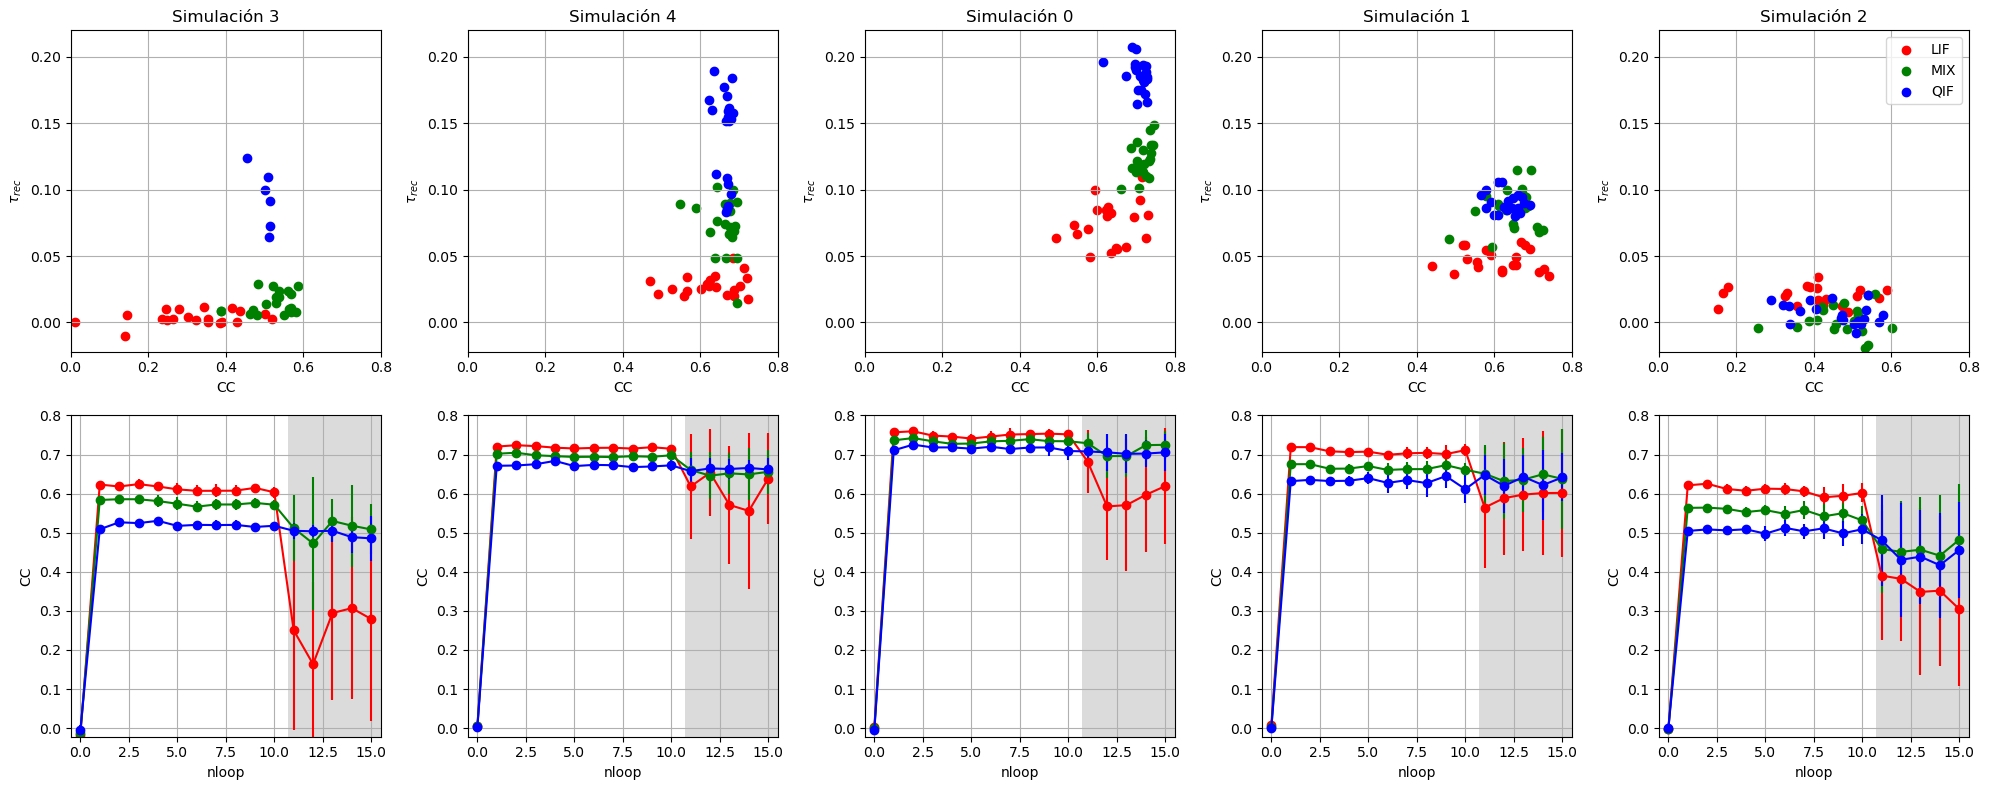

In [65]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # Modifica el tamaño aquí según sea necesario
nums_sim = [3, 4, 0,1,2]
colores = ['r', 'g', 'b']

for index in range(len(nums_sim)):
    num_sim = nums_sim[index] 
    nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Llama a la función cargar_archivo_parametros con el nombre del archivo CSV
    filename_parametros = f"simulacion_{num_sim}/simulacion_{num_sim}_parametros.csv"  # Reemplaza 'ruta/a/la/carpeta' con la ruta real de tu carpeta
    parametros = cargar_archivo_parametros(filename_parametros)

    # Ahora puedes acceder a los parámetros como lo harías normalmente
    N = parametros['N']
    nloop = parametros['nloop']
    nloop_train = 10
    cant_seed = parametros['cant_seed']
    gsyn = parametros['gsyn']

    # Crear una figura más pequeña con dos plots separados, cada uno con tres subplots


    # Obtener los valores únicos de 'pqif'
    pqif_values = data['pqif'].unique()

    for i in range(len(pqif_values)):
        pqif_value = pqif_values[i]
        color = colores[i]

        if pqif_value == 0:
            label = 'LIF'
        elif pqif_value == 0.5:
            label = 'MIX'
        elif pqif_value == 1:
            label = 'QIF'
        
        # Seleccionar los datos de los loops desde 10 hasta nloop-1 para el valor actual de 'pqif'
        df_loops = data[(data['pqif'] == pqif_value) & (data['nloop'] >= 10) & (data['nloop'] < nloop)]

        # Calcular el promedio de cc y tau_rec para los datos seleccionados
        mean_cc = df_loops.groupby(['seed']).mean().reset_index()

        # Graficar el scatter plot y la línea de promedio
        axs[0, index].scatter(mean_cc['cc'], mean_cc['tau_rec'], label=label, color=color)
    
    

    if index == len(nums_sim)-1:
        axs[0, index].legend()

    # Ajustar el diseño de los subplots
    axs[0, index].set_xlim(0, 0.8)
    axs[0, index].grid()
    axs[0, index].set_xlabel('CC')
    axs[0, index].set_ylabel(r'$\tau_{rec}$')
    axs[0, index].set_title(f'Simulación {num_sim}')
    axs[0, index].set_ylim(-0.022, 0.22)

    # Iterar sobre los valores únicos de 'pqif' para graficar todas las líneas en el subplot actual
    for i in range(len(pqif_values)):
        pqif_value = pqif_values[i]
        color = colores[i]
        # Filtrar los datos para el valor actual de 'pqif'
        data_pqif = data[(data['pqif'] == pqif_value)]

        # Calcular el promedio y la desviación estándar para cada combinación de 'nloop' y 'columna'
        grouped_data = data_pqif.groupby(['nloop'])
        for columna in ['cc']:
            grouped_column_data = grouped_data[columna].agg(['mean', 'std']).reset_index()

            # Graficar cc vs nloop para cada 'pqif' con barras de error
            axs[1, index].errorbar(grouped_column_data['nloop'], grouped_column_data['mean'], yerr=grouped_column_data['std'], label=label, color = color, fmt='-o')
            # Agregar sombreado gris solo para nloop >= 11
            axs[1, index].axvspan(10.7,16, facecolor='gray', alpha=0.1)
            
        # Agregar leyenda al subplot actual


    # Ajustar el diseño de los subplots
    axs[1, index].grid()
    axs[1, index].set_xlabel('nloop')
    axs[1, index].set_ylabel('CC')
    axs[1, index].set_ylim(-0.022, 0.8)
    axs[1, index].set_xlim(-0.5, 15.5)
    #axs[1, num_sim].set_ylim(0.5, 0.775)
# Ajustar los subplots para evitar solapamientos
plt.tight_layout()

# Mostrar la figura
plt.show()

0


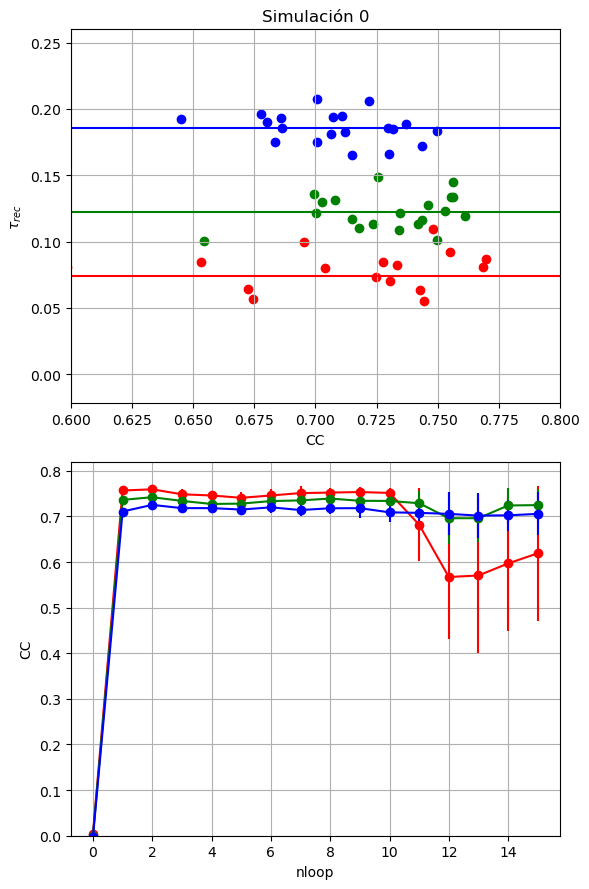

In [66]:
fig, axs = plt.subplots(2, 1, figsize=(6, 9))  # Modifica el tamaño aquí según sea necesario
nums_sim = [0]
for index in range(len(nums_sim)):
    print(index)
    num_sim = nums_sim[index]
    nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Llama a la función cargar_archivo_parametros con el nombre del archivo CSV
    nombre_carpeta = f"simulacion_{num_sim}/simulacion_{num_sim}_parametros.csv"  # Reemplaza 'ruta/a/la/carpeta' con la ruta real de tu carpeta

    # Ahora puedes acceder a los parámetros como lo harías normalmente
    N = parametros['N']
    nloop = parametros['nloop']
    nloop_train = 10
    cant_seed = 6
    gsyn = parametros['gsyn']

    # Crear una figura más pequeña con dos plots separados, cada uno con tres subplots


    # Obtener los valores únicos de 'pqif'
    pqif_values = data['pqif'].unique()
    df_nloop = data[(data['nloop'] == 11)]

    # Iterar sobre los valores únicos de 'pqif' para graficar todas las líneas en el subplot actual
    for i in range(len(pqif_values)):
        pqif_value = pqif_values[i]
        color = colores[i]
        axs[0].scatter(df_nloop[df_nloop['pqif'] == pqif_value]['cc'], df_nloop[df_nloop['pqif'] == pqif_value]['tau_rec'], label=f'pqif={pqif_value}', color=color)
        axs[0].axhline(np.mean(df_nloop[df_nloop['pqif'] == pqif_value]['tau_rec']), color = color)

    

    # Ajustar el diseño de los subplots
    axs[0].set_xlim(0.6, 0.8)
    axs[0].grid()
    axs[0].set_xlabel('CC')
    axs[0].set_ylabel(r'$\tau_{rec}$')
    axs[0].set_title(f'Simulación {num_sim}')
    axs[0].set_ylim(-0.022, 0.26)

    # Iterar sobre los valores únicos de 'pqif' para graficar todas las líneas en el subplot actual
    for i in range(len(pqif_values)):
        pqif_value = pqif_values[i]
        color = colores[i]
        # Filtrar los datos para el valor actual de 'pqif'
        data_pqif = data[(data['pqif'] == pqif_value) ]

        # Calcular el promedio y la desviación estándar para cada combinación de 'nloop' y 'columna'
        grouped_data = data_pqif.groupby(['nloop'])
        for columna in ['cc']:
            grouped_column_data = grouped_data[columna].agg(['mean', 'std']).reset_index()

            # Graficar cc vs nloop para cada 'pqif' con barras de error
            axs[1].errorbar(grouped_column_data['nloop'], grouped_column_data['mean'], yerr=grouped_column_data['std'], label=f'pqif={pqif_value}', color = color, fmt='-o')
            
        # Agregar leyenda al subplot actual


    # Ajustar el diseño de los subplots
    axs[1].grid()
    axs[1].set_xlabel('nloop')
    axs[1].set_ylabel('CC')
    axs[1].set_ylim(0, 0.82)

    #axs[1, num_sim].set_ylim(0.5, 0.775)
# Ajustar los subplots para evitar solapamientos
plt.tight_layout()

# Mostrar la figura
plt.show()

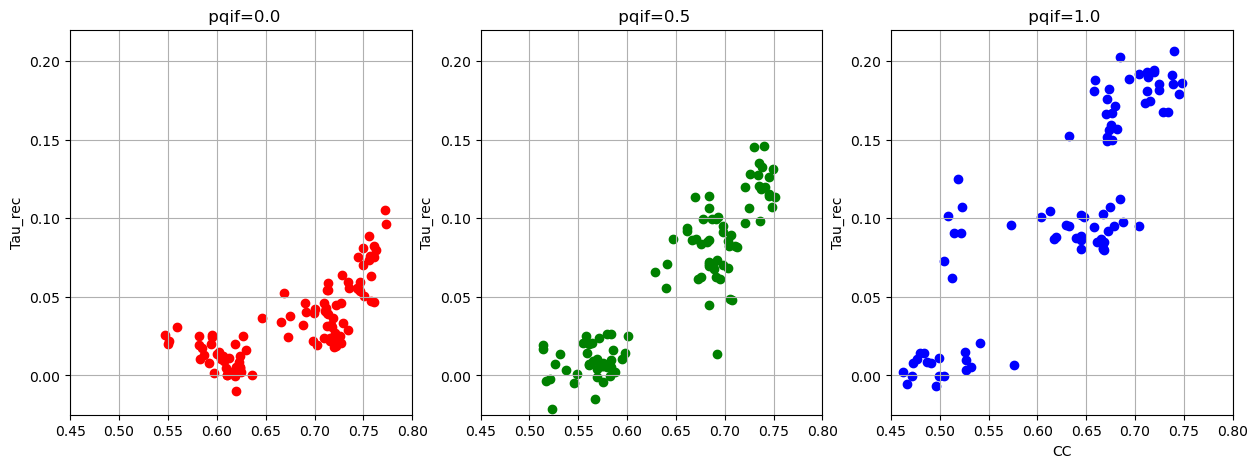

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Obtener los colores para cada valor único de 'pqif'
colores = ['r', 'g', 'b']

fig, axs = plt.subplots(1, len(pqif_values), figsize=(15, 5), sharex=True)
# Iterar sobre cada simulación
numeros_sim = [3, 4, 0, 1, 2]
for j in  range(len(numeros_sim)):
    num_sim = numeros_sim[j]
    nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Filtrar los datos para nloop = 9
    data_nloop_9 = data[data['nloop'] == 9]

    # Obtener los valores únicos de 'pqif' para esta simulación
    pqif_values = data_nloop_9['pqif'].unique()

    # Crear una figura para esta simulación
    

    # Iterar sobre cada valor único de 'pqif'
    for i, pqif_value in enumerate(pqif_values):
        # Filtrar los datos para este valor de 'pqif'
        data_pqif = data_nloop_9[data_nloop_9['pqif'] == pqif_value]

        # Obtener los valores de tau_rec y cc para este valor de 'pqif'
        tau_rec_values = data_pqif['tau_rec']
        cc_values = data_pqif['cc']

        # Graficar tau_rec vs cc para este valor de 'pqif'
        axs[i].scatter(cc_values, tau_rec_values, label=f' {num_sim}', color=colores[i])
        axs[i].set_title(f' pqif={pqif_value}')

        # Añadir etiquetas solo al eje y del último subplot
        if i == len(pqif_values) - 1:
            axs[i].set_xlabel('CC')
        axs[i].set_ylabel('Tau_rec')

        # Ajustar el diseño del subplot
        axs[i].grid(True)
        axs[i].set_xlim(0.45, 0.8)
        axs[i].set_ylim(-0.025, 0.22)

        



    # Mostrar la figura
plt.show()

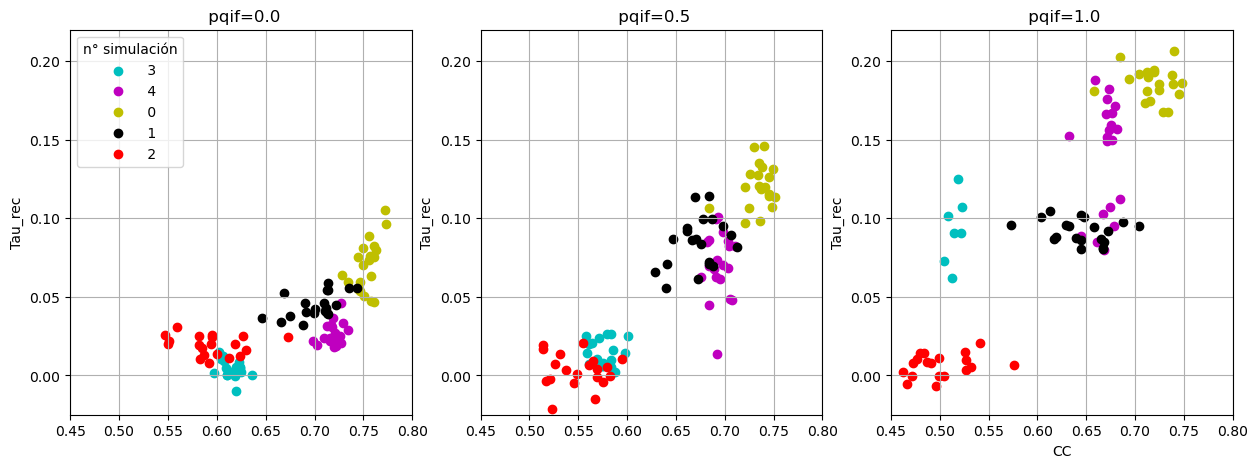

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Obtener los colores para cada valor único de 'pqif'
colores = ['c', 'm', 'y', 'k', 'r']

fig, axs = plt.subplots(1, len(pqif_values), figsize=(15, 5), sharex=True)
# Iterar sobre cada simulación
numeros_sim = [3, 4, 0, 1, 2]
for j in  range(len(numeros_sim)):
    num_sim = numeros_sim[j]
    nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Filtrar los datos para nloop = 9
    data_nloop_9 = data[data['nloop'] == 9]

    # Obtener los valores únicos de 'pqif' para esta simulación
    pqif_values = data_nloop_9['pqif'].unique()

    # Crear una figura para esta simulación
    

    # Iterar sobre cada valor único de 'pqif'
    for i, pqif_value in enumerate(pqif_values):
        # Filtrar los datos para este valor de 'pqif'
        data_pqif = data_nloop_9[data_nloop_9['pqif'] == pqif_value]

        # Obtener los valores de tau_rec y cc para este valor de 'pqif'
        tau_rec_values = data_pqif['tau_rec']
        cc_values = data_pqif['cc']

        # Graficar tau_rec vs cc para este valor de 'pqif'
        axs[i].scatter(cc_values, tau_rec_values, label=f' {num_sim}', color=colores[j])
        axs[i].set_title(f' pqif={pqif_value}')

        # Añadir etiquetas solo al eje y del último subplot
        if i == len(pqif_values) - 1:
            axs[i].set_xlabel('CC')
        axs[i].set_ylabel('Tau_rec')

        # Ajustar el diseño del subplot
        axs[i].grid(True)
        axs[i].set_xlim(0.45, 0.8)
        axs[i].set_ylim(-0.025, 0.22)

        if i == 0:
            axs[i].legend(title  = 'n° simulación', loc = 'upper left')
        



    # Mostrar la figura
plt.show()





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


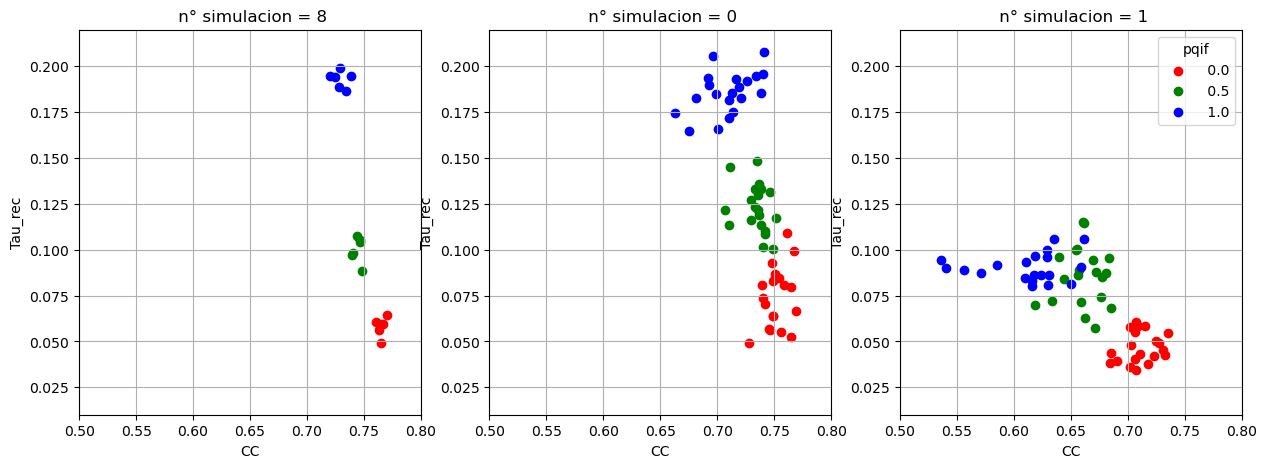

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Obtener los colores para cada valor único de 'pqif'
colores = ['r', 'g', 'b']
# Iterar sobre cada simulación
numeros_sim = [ 8, 0, 1]
fig, axs = plt.subplots(1, len(numeros_sim), figsize=(15, 5), sharex=True)
for j in  range(len(numeros_sim)):
    num_sim = numeros_sim[j]
    nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Filtrar los datos para nloop = 9
    data_nloop_9 = data[data['nloop'] == 10]

    # Obtener los valores únicos de 'pqif' para esta simulación
    pqif_values = data_nloop_9['pqif'].unique()

    # Crear una figura para esta simulación
    

    # Iterar sobre cada valor único de 'pqif'
    for i, pqif_value in enumerate(pqif_values):
        # Filtrar los datos para este valor de 'pqif'
        data_pqif = data_nloop_9[data_nloop_9['pqif'] == pqif_value]

        # Obtener los valores de tau_rec y cc para este valor de 'pqif'
        tau_rec_values = data_pqif['tau_rec']
        cc_values = data_pqif['cc']

        # Graficar tau_rec vs cc para este valor de 'pqif'
        axs[j].scatter(cc_values, tau_rec_values, label=f' {pqif_value}', color=colores[i])
        axs[j].set_title(f' n° simulacion = {num_sim}')


        axs[j].set_xlabel('CC')
        axs[j].set_ylabel('Tau_rec')

        # Ajustar el diseño del subplot
        axs[j].grid(True)
        axs[j].set_xlim(0.5, 0.8)
        axs[j].set_ylim(0.01, 0.22)

        if i == 2:
            plt.legend(title  = 'pqif')
        



    # Mostrar la figura
plt.show()


In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Inicializa los diccionarios para almacenar los valores de tau_rec para cada cuadrante y simulación
tau_rec_cuadrante1 = {}
tau_rec_cuadrante4 = {}

# Itera sobre las simulaciones
for num_sim in range(3):
    # Carga los datos desde el archivo
    nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data_nloop_9 = pd.read_csv(nombre_archivo)
    
    # Obtiene los valores únicos de 'pqif' para esta simulación
    pqif_values = data_nloop_9['pqif'].unique()
    
    # Itera sobre cada valor único de 'pqif'
    for pqif_value in pqif_values:
        # Filtra los datos para este valor de 'pqif'
        data_pqif = data_nloop_9[data_nloop_9['pqif'] == pqif_value]

        # Obtiene los valores de tau_rec y cc para este valor de 'pqif' y cada cuadrante
        tau_rec_values1 = data_pqif['tau_rec1']
        tau_rec_values4 = data_pqif['tau_rec4']
        cc_values = data_pqif['cc']
        
        # Guarda los valores de tau_rec para cada cuadrante
        for tau_rec1, tau_rec4, cc in zip(tau_rec_values1, tau_rec_values4, cc_values):
            if cc not in tau_rec_cuadrante1:
                tau_rec_cuadrante1[cc] = []
                tau_rec_cuadrante4[cc] = []
            tau_rec_cuadrante1[cc].append(tau_rec1)
            tau_rec_cuadrante4[cc].append(tau_rec4)

# Grafica tau_rec1 y tau_rec4 en función de cc
plt.figure(figsize=(10, 6))
for cc, tau_rec1_values in tau_rec_cuadrante1.items():
    plt.scatter([cc] * len(tau_rec1_values), tau_rec1_values, color='blue', alpha=0.5, label='Cuadrante 1')
for cc, tau_rec4_values in tau_rec_cuadrante4.items():
    plt.scatter([cc] * len(tau_rec4_values), tau_rec4_values, color='red', alpha=0.5, label='Cuadrante 4')

# Etiquetas y leyenda
plt.xlabel('Valor de cc')
plt.ylabel('Valor de tau_rec')
plt.legend(['Cuadrante 1', 'Cuadrante 4'])
plt.title('Valores de tau_rec1 y tau_rec4 en función de cc')
plt.grid(True)
plt.show()


KeyError: 'tau_rec1'

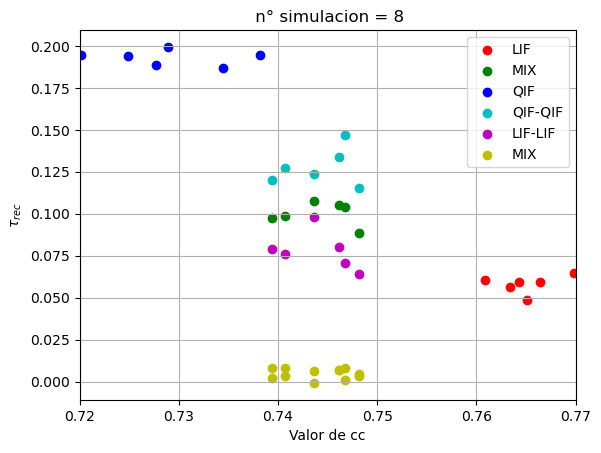

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Obtener los colores para cada valor único de 'pqif'
colores = ['r', 'g', 'b']
# Iterar sobre cada simulación
numeros_sim = [8]
for j in  range(len(numeros_sim)):
    num_sim = numeros_sim[j]
    nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Filtrar los datos para nloop = 9
    data_nloop_10 = data[data['nloop'] == 10]

    # Obtener los valores únicos de 'pqif' para esta simulación
    pqif_values = data_nloop_10['pqif'].unique()

    # Iterar sobre cada valor único de 'pqif'
    for i, pqif_value in enumerate(pqif_values):
        # Filtrar los datos para este valor de 'pqif'
        data_pqif = data_nloop_10[data_nloop_10['pqif'] == pqif_value]

        # Obtener los valores de tau_rec y cc para este valor de 'pqif'
        tau_rec_values = data_pqif['tau_rec']
        cc_values = data_pqif['cc']

        if pqif_value == 0:
            label = 'LIF'
        elif pqif_value == 0.5:
            label = 'MIX'
        elif pqif_value == 1:
            label = 'QIF'

        # Graficar tau_rec vs cc para este valor de 'pqif'
        plt.scatter(cc_values, tau_rec_values, label=label, color=colores[i])
        plt.title(f' n° simulacion = {num_sim}')


        plt.xlabel('CC')
        plt.ylabel('Tau_rec')

        # Ajustar el diseño del subplot
        plt.grid(True)


        if i == 2:
            plt.legend(title  = 'pqif')

    # Mostrar la figura


# Inicializa las variables y estructuras de datos necesarias
simulations = [8]
# Inicializar listas para almacenar los valores de tau_rec para cada cuadrante y simulación
tau_rec_cuadrante1 = []
tau_rec_cuadrante2 = []
tau_rec_cuadrante3 = []
tau_rec_cuadrante4 = []
cc_values = []

# Bucle sobre las simulaciones
for num_sim in simulations:
    pqif = 0.5

    # Bucle sobre las semillas
    for k in range(cant_seed):
        # Simular y calcular tau_rec para cada cuadrante
        matrix = csv_to_matrix(f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
        rows, cols = matrix.shape
        mid_row, mid_col = rows // 2, cols // 2
        cuadrante1 = matrix[:mid_row, :mid_col]
        cuadrante2 = matrix[:mid_row, mid_col:]
        cuadrante3 = matrix[mid_row:, :mid_col]
        cuadrante4 = matrix[mid_row:, mid_col:]
        
        _, tau_rec1, _, _, _ = motifs(cuadrante1, N/2)
        _, tau_rec2, _, _, _ = motifs(cuadrante2, N/2)
        _, tau_rec3, _, _, _ = motifs(cuadrante3, N/2)
        _, tau_rec4, _, _, _ = motifs(cuadrante4, N/2)
        
        # Guardar los valores de tau_rec y cc para cada cuadrante
        tau_rec_cuadrante1.append(tau_rec1)
        tau_rec_cuadrante2.append(tau_rec2)
        tau_rec_cuadrante3.append(tau_rec3)
        tau_rec_cuadrante4.append(tau_rec4)

        # Obtener los valores de cc para esta semilla desde el archivo de resultados
        nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
        data = pd.read_csv(nombre_archivo)
        data_select = data[(data['pqif'] == 0.5) & (data['nloop'] == 10) & (data['seed'] == k)]
        cc_values.append(data_select['cc'].values[0])

# Convertir las listas a arrays de numpy para facilitar el manejo de los datos
tau_rec_cuadrante1 = np.array(tau_rec_cuadrante1)
tau_rec_cuadrante2 = np.array(tau_rec_cuadrante2)
tau_rec_cuadrante3 = np.array(tau_rec_cuadrante3)
tau_rec_cuadrante4 = np.array(tau_rec_cuadrante4)
cc_values = np.array(cc_values)

# Graficar tau_rec para todos los cuadrantes en función de cc
# Graficar tau_rec para todos los cuadrantes en función de cc
plt.scatter(cc_values, tau_rec_cuadrante1, color='c', label='QIF-QIF')
plt.scatter(cc_values, tau_rec_cuadrante4, color='m', label='LIF-LIF')
plt.scatter(cc_values, tau_rec_cuadrante2, color='y', label='MIX')
plt.scatter(cc_values, tau_rec_cuadrante3, color='y')
  
plt.xlim(0.72, 0.77)
# Etiquetas y leyenda
plt.xlabel('Valor de cc')
plt.ylabel(r'$\tau_{rec}$')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Obtener los colores para cada valor único de 'pqif'
colores = ['r', 'g', 'b']
# Iterar sobre cada simulación
numeros_sim = [0]
for j in  range(len(numeros_sim)):
    num_sim = numeros_sim[j]
    nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Filtrar los datos para nloop = 9
    data_nloop_10 = data[data['nloop'] == 10]

    # Obtener los valores únicos de 'pqif' para esta simulación
    pqif_values = [0.5]

    # Iterar sobre cada valor único de 'pqif'
    for i, pqif_value in enumerate(pqif_values):
        # Filtrar los datos para este valor de 'pqif'
        data_pqif = data_nloop_10[data_nloop_10['pqif'] == pqif_value]

        # Obtener los valores de tau_rec y cc para este valor de 'pqif'
        tau_rec_values = data_pqif['tau_rec']
        cc_values = data_pqif['cc']

        # Graficar tau_rec vs cc para este valor de 'pqif'
        plt.scatter(cc_values, tau_rec_values, label=f' {pqif_value}', color= 'black')
        plt.title(f' n° simulacion = {num_sim}')


        plt.xlabel('CC')
        plt.ylabel('Tau_rec')

        # Ajustar el diseño del subplot
        plt.grid(True)


        if i == 2:
            plt.legend(title  = 'pqif')

    # Mostrar la figura

# Inicializa las variables y estructuras de datos necesarias
simulations = [0]
# Inicializar listas para almacenar los valores de tau_rec para cada cuadrante y simulación
tau_rec_cuadrante1 = []
tau_rec_cuadrante2 = []
tau_rec_cuadrante3 = []
tau_rec_cuadrante4 = []
cc_values = []

# Bucle sobre las simulaciones
for num_sim in simulations:
    pqif = 0.5

    # Bucle sobre las semillas
    for k in range(cant_seed):
        # Simular y calcular tau_rec para cada cuadrante
        matrix = csv_to_matrix(f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
        rows, cols = matrix.shape
        mid_row, mid_col = rows // 2, cols // 2
        cuadrante1 = matrix[:mid_row, :mid_col]
        cuadrante2 = matrix[:mid_row, mid_col:]
        cuadrante3 = matrix[mid_row:, :mid_col]
        cuadrante4 = matrix[mid_row:, mid_col:]
        
        _, tau_rec1, _, _, _ = motifs(cuadrante1, N/2)
        _, tau_rec2, _, _, _ = motifs(cuadrante2, N/2)
        _, tau_rec3, _, _, _ = motifs(cuadrante3, N/2)
        _, tau_rec4, _, _, _ = motifs(cuadrante4, N/2)
        
        # Guardar los valores de tau_rec y cc para cada cuadrante
        tau_rec_cuadrante1.append(tau_rec1)
        tau_rec_cuadrante2.append(tau_rec2)
        tau_rec_cuadrante3.append(tau_rec3)
        tau_rec_cuadrante4.append(tau_rec4)

        # Obtener los valores de cc para esta semilla desde el archivo de resultados
        nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
        data = pd.read_csv(nombre_archivo)
        data_select = data[(data['pqif'] == 0.5) & (data['nloop'] == 10) & (data['seed'] == k)]
        cc_values.append(data_select['cc'].values[0])

# Convertir las listas a arrays de numpy para facilitar el manejo de los datos
tau_rec_cuadrante1 = np.array(tau_rec_cuadrante1)
tau_rec_cuadrante2 = np.array(tau_rec_cuadrante2)
tau_rec_cuadrante3 = np.array(tau_rec_cuadrante3)
tau_rec_cuadrante4 = np.array(tau_rec_cuadrante4)
cc_values = np.array(cc_values)

# Graficar tau_rec para todos los cuadrantes en función de cc
plt.scatter(cc_values, tau_rec_cuadrante1, color='blue', label='Cuadrante 1')
plt.scatter(cc_values, tau_rec_cuadrante2, color='green', label='Cuadrante 2')
plt.scatter(cc_values, tau_rec_cuadrante3, color='orange', label='Cuadrante 3')
plt.scatter(cc_values, tau_rec_cuadrante4, color='red', label='Cuadrante 4')

# Etiquetas y leyenda
plt.xlabel('Valor de cc')
plt.ylabel(r'$\tau_{rec}$')
plt.legend()
plt.grid(True)
plt.title('Valores de tau_rec en función de cc para todos los cuadrantes')
plt.show()


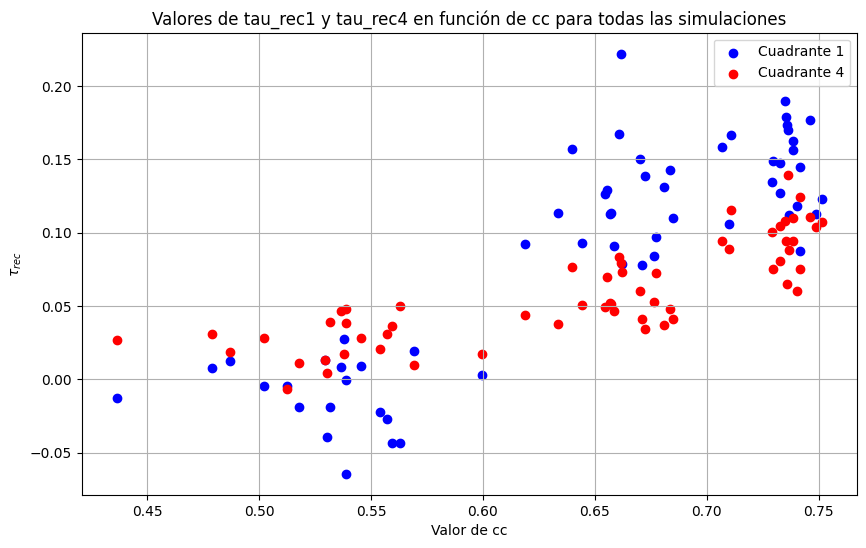

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Inicializa las variables y estructuras de datos necesarias
simulations = [0, 1, 2]
tau_rec_cuadrante1 = []
tau_rec_cuadrante4 = []
cc_values = []

# Bucle sobre las simulaciones
for num_sim in simulations:
    pqif = 0.5

    # Bucle sobre las semillas
    for k in range(cant_seed):
        # Simular y calcular tau_rec para cada cuadrante
        matrix = csv_to_matrix(f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
        rows, cols = matrix.shape
        mid_row, mid_col = rows // 2, cols // 2
        cuadrante1 = matrix[:mid_row, :mid_col]
        cuadrante4 = matrix[mid_row:, mid_col:]
        
        _, tau_rec1, _, _, _ = motifs(cuadrante1, N/2)
        _, tau_rec4, _, _, _ = motifs(cuadrante4, N/2)

        # Guardar los valores de tau_rec y cc para cada cuadrante
        tau_rec_cuadrante1.append(tau_rec1)
        tau_rec_cuadrante4.append(tau_rec4)

        nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
        data = pd.read_csv(nombre_archivo)
        data_select= data[(data['pqif'] == 0.5) & (data['nloop'] == 10) & (data['seed'] == k)]

        # Calcular y guardar el valor de cc para esta semilla
        cc_values.append(data_select['cc'])

# Convertir a arrays de numpy para facilitar el manejo de los datos
tau_rec_cuadrante1 = np.array(tau_rec_cuadrante1)
tau_rec_cuadrante4 = np.array(tau_rec_cuadrante4)
cc_values = np.array(cc_values)

# Graficar tau_rec1 y tau_rec4 en función de cc
plt.figure(figsize=(10, 6))
plt.scatter(cc_values, tau_rec_cuadrante1, color='b', label='Cuadrante 1')
plt.scatter(cc_values, tau_rec_cuadrante4, color='r', label='Cuadrante 4')

# Etiquetas y leyenda
plt.xlabel('Valor de cc')
plt.ylabel(r'$\tau_{rec}$')
plt.legend()
plt.grid(True)
plt.title('Valores de tau_rec1 y tau_rec4 en función de cc para todas las simulaciones')
plt.show()


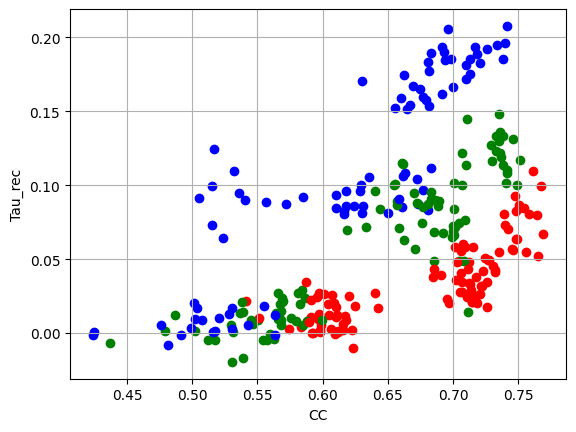

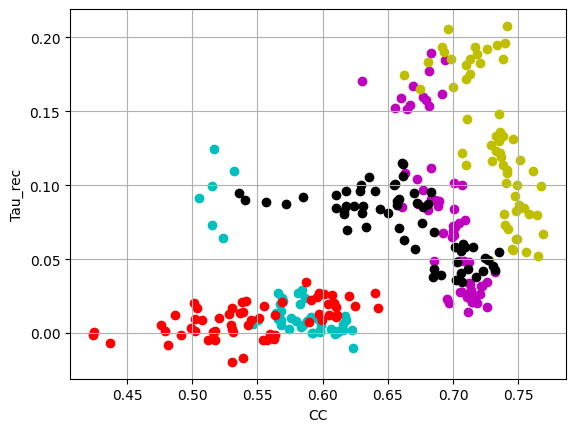

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Obtener los colores para cada valor único de 'pqif'
colores = ['r', 'g', 'b']

# Iterar sobre cada simulación
for num_sim in [3, 4, 0, 1, 2]:
    nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Filtrar los datos para nloop = 9
    data_nloop_9 = data[data['nloop'] == 10]

    # Obtener los valores únicos de 'pqif' para esta simulación
    pqif_values = data_nloop_9['pqif'].unique()

    # Crear una figura para esta simulación
    

    # Iterar sobre cada valor único de 'pqif'
    for i, pqif_value in enumerate(pqif_values):
        # Filtrar los datos para este valor de 'pqif'
        data_pqif = data_nloop_9[data_nloop_9['pqif'] == pqif_value]

        # Obtener los valores de tau_rec y cc para este valor de 'pqif'
        tau_rec_values = data_pqif['tau_rec']
        cc_values = data_pqif['cc']

        # Graficar tau_rec vs cc para este valor de 'pqif'
        plt.scatter(cc_values, tau_rec_values, label=f'pqif={pqif_value}', color=colores[i])

        # Ajustar el diseño del subplot
        plt.grid(True)

        plt.xlabel('CC')
        plt.ylabel('Tau_rec')



    # Mostrar la figura
plt.show()


# Obtener los colores para cada valor único de 'pqif'
colores = ['c', 'm', 'y', 'k', 'r']

numeros_sim = [3, 4, 0, 1, 2]
for j in  range(len(numeros_sim)):
    num_sim = numeros_sim[j]
    nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Filtrar los datos para nloop = 9
    data_nloop_9 = data[data['nloop'] == 10]

    # Obtener los valores únicos de 'pqif' para esta simulación
    pqif_values = data_nloop_9['pqif'].unique()

    # Crear una figura para esta simulación
    

    # Iterar sobre cada valor único de 'pqif'
    for i, pqif_value in enumerate(pqif_values):
        # Filtrar los datos para este valor de 'pqif'
        data_pqif = data_nloop_9[data_nloop_9['pqif'] == pqif_value]

        # Obtener los valores de tau_rec y cc para este valor de 'pqif'
        tau_rec_values = data_pqif['tau_rec']
        cc_values = data_pqif['cc']

        # Graficar tau_rec vs cc para este valor de 'pqif'
        plt.scatter(cc_values, tau_rec_values, label=f'pqif={pqif_value}', color=colores[j])

        # Ajustar el diseño del subplot
        plt.grid(True)

        plt.xlabel('CC')
        plt.ylabel('Tau_rec')



    # Mostrar la figura
plt.show()




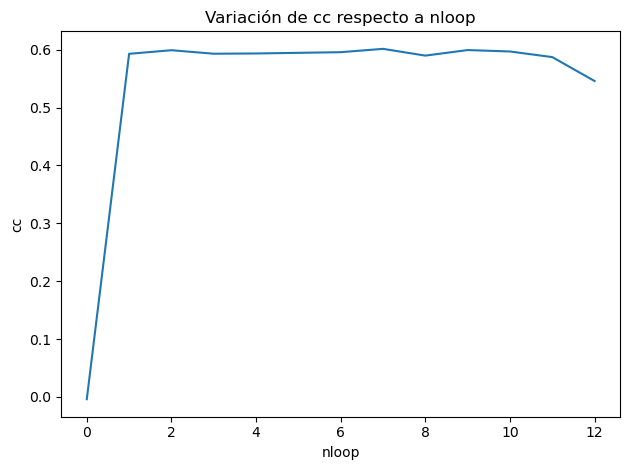

In [ ]:

# Definir el tamaño de la figura
num_sim = 5
nombre_archivo = f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
data = pd.read_csv(nombre_archivo)

# Crear la figura y los subplots
fig, ax = plt.subplots()

# Graficar los datos
ax.plot(data['nloop'], data['cc'])

# Añadir etiquetas y título
ax.set_xlabel('nloop')
ax.set_ylabel('cc')
ax.set_title('Variación de cc respecto a nloop')

# Ajustar el diseño de la figura
plt.tight_layout()

# Mostrar la figura
plt.show()

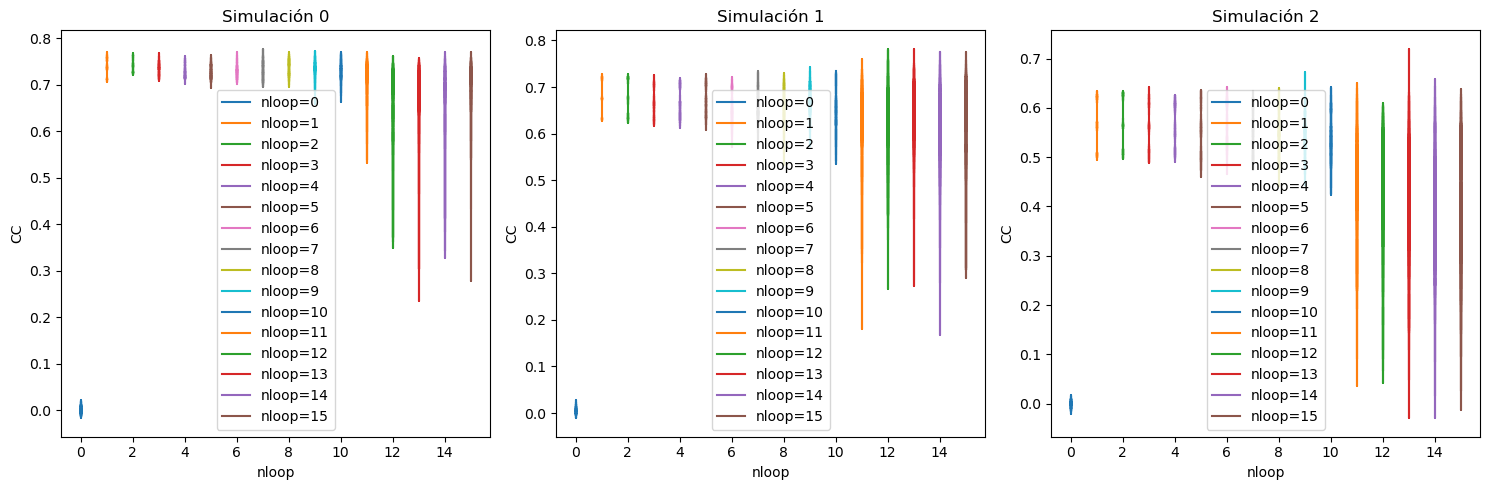

In [ ]:
# Definir el tamaño de la figura
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bucle sobre las simulaciones
for num_sim in range(3):
    nombre_archivo = f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Llama a la función cargar_archivo_parametros con el nombre del archivo CSV
    nombre_carpeta = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}"  # Reemplaza 'ruta/a/la/carpeta' con la ruta real de tu carpeta
    filename_parametros = os.path.join(nombre_carpeta, f'simulacion_{num_sim}_parametros.csv')  # Reemplaza 'simulacion_1_parametros.csv' con el nombre real de tu archivo CSV
    parametros = cargar_archivo_parametros(filename_parametros)

    # Ahora puedes acceder a los parámetros como lo harías normalmente
    N = parametros['N']
    nloop = parametros['nloop']
    cant_seed = parametros['cant_seed']
    gsyn = parametros['gsyn']

    # Agrupar los datos por 'nloop'
    grouped_data = data.groupby('nloop')

    # Iterar sobre cada grupo y graficar los datos de cc para cada semilla
    for nloop_value, group in grouped_data:
        axs[num_sim].plot(group['nloop'], group['cc'], label=f'nloop={nloop_value}')

    # Configurar las etiquetas y título del gráfico
    axs[num_sim].set_xlabel('nloop')
    axs[num_sim].set_ylabel('CC')
    axs[num_sim].set_title(f'Simulación {num_sim}')
    axs[num_sim].legend()

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()



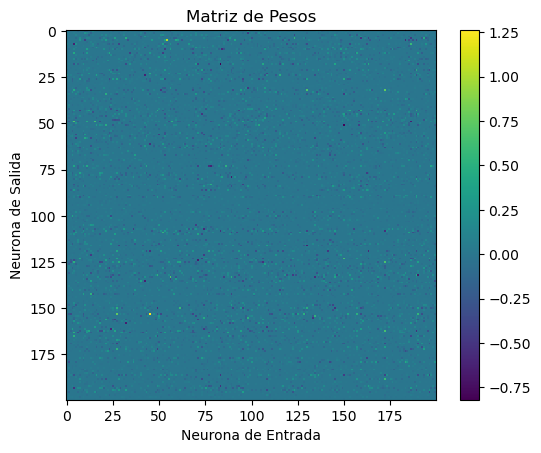

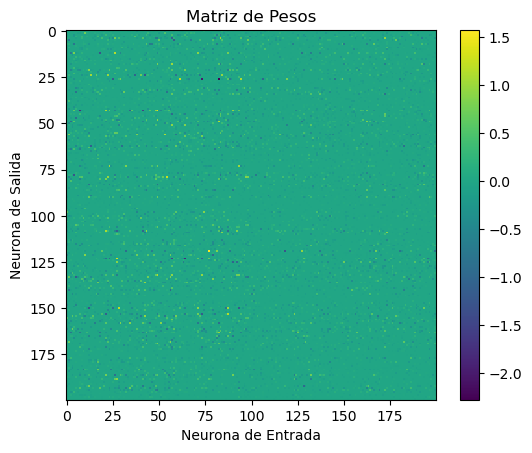

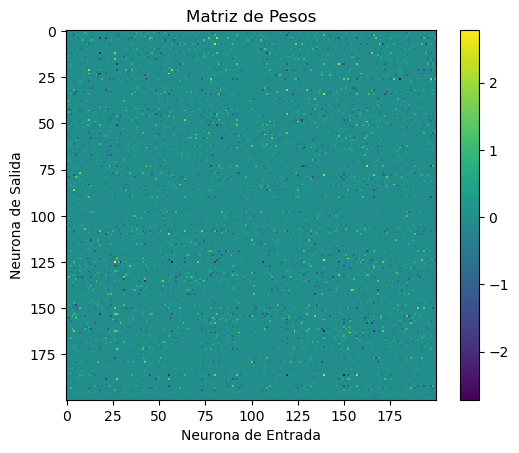

In [ ]:
for i in range(len(pqif_vector)):
    pqif = pqif_vector[i]
    filename = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_0"
    weights_matrix = csv_to_matrix(filename)
    plt.imshow(weights_matrix, cmap='viridis', interpolation='nearest')

    # Añadir barra de color para representar los valores de los pesos
    plt.colorbar()

    # Añadir título y etiquetas de los ejes
    plt.title('Matriz de Pesos')
    plt.xlabel('Neurona de Entrada')
    plt.ylabel('Neurona de Salida')

    # Mostrar la gráfica
    plt.show()

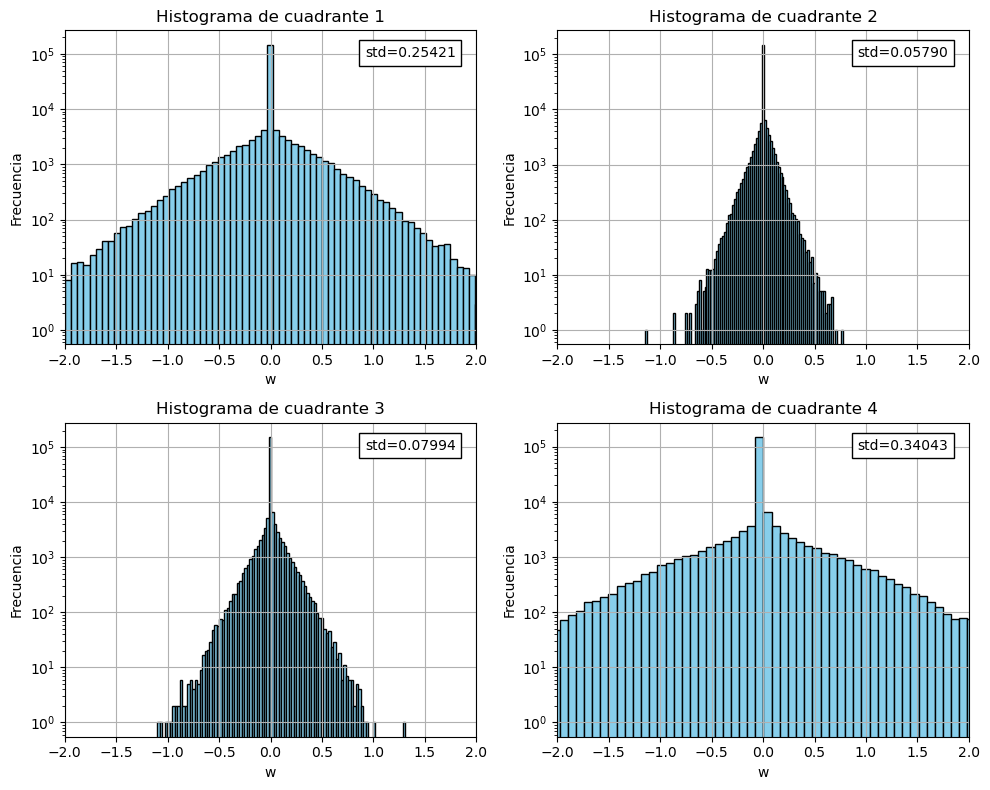

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for m, ax in enumerate(axes.flatten()):
    # Concatenar todas las matrices del cuadrante en una sola matriz
    cuadrante_combined = np.concatenate(cuadrantes[m])
    

    # Construir el histograma en el subplot correspondiente
    counts, bins = np.histogram(cuadrante_combined.flatten(), bins=100)
    std = np.std(cuadrante_combined.flatten())
    text_x = 0.95
    text_y = 0.95
    ax.text(text_x, text_y, f"std={std:.5f}", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=1))

    ax.hist(bins[:-1], bins, weights=counts, color='skyblue', edgecolor='black')
    ax.set_title(f'Histograma de cuadrante {m+1}')
    ax.set_xlabel('w')
    ax.set_ylabel('Frecuencia')
    ax.set_yscale("log")
    ax.set_xlim(-2,2)
    ax.grid(True)

plt.tight_layout()
plt.show()


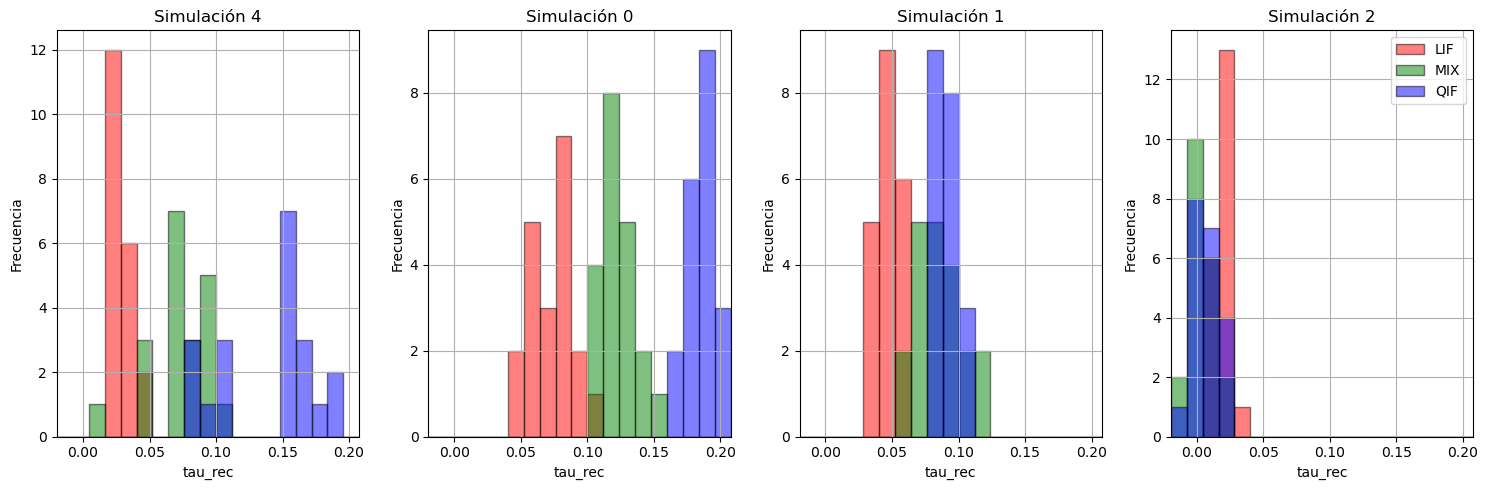

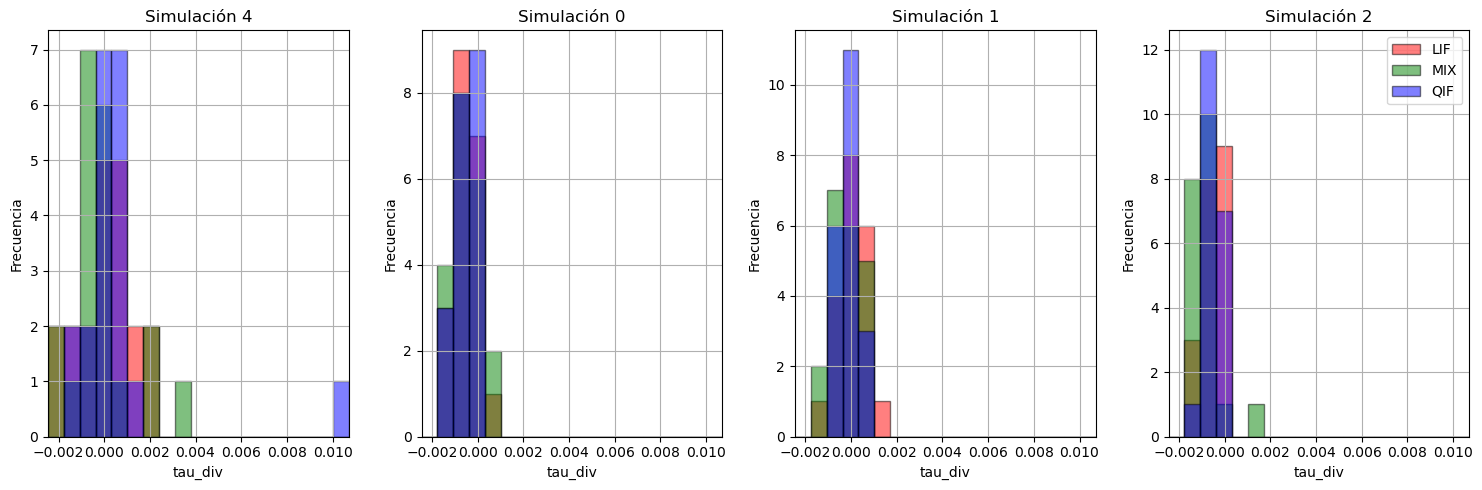

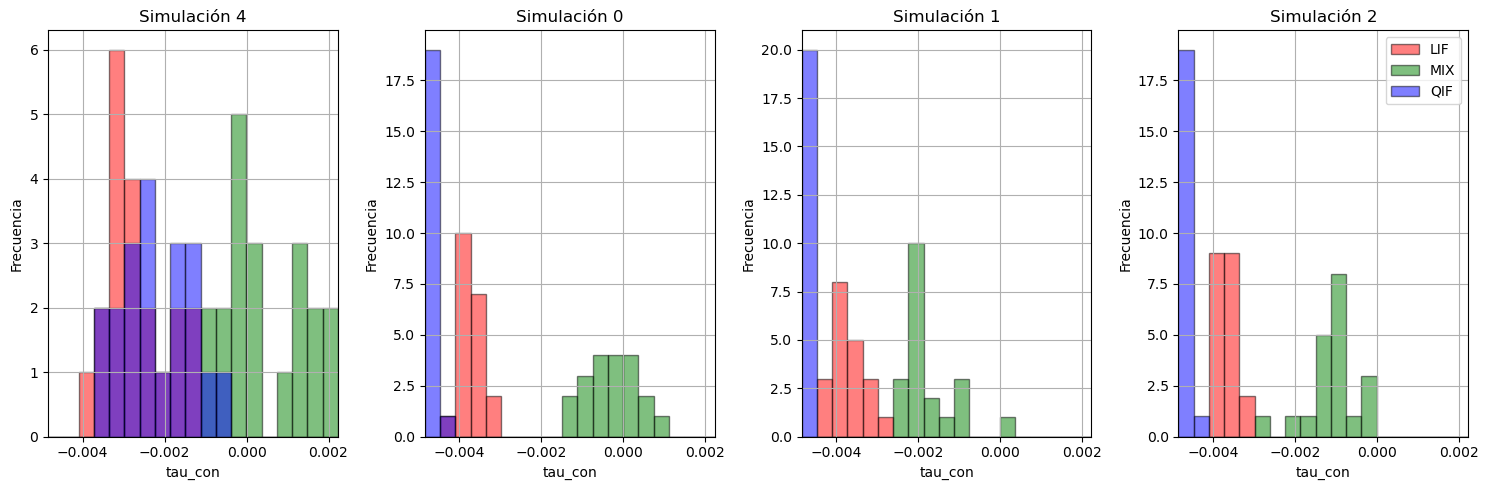

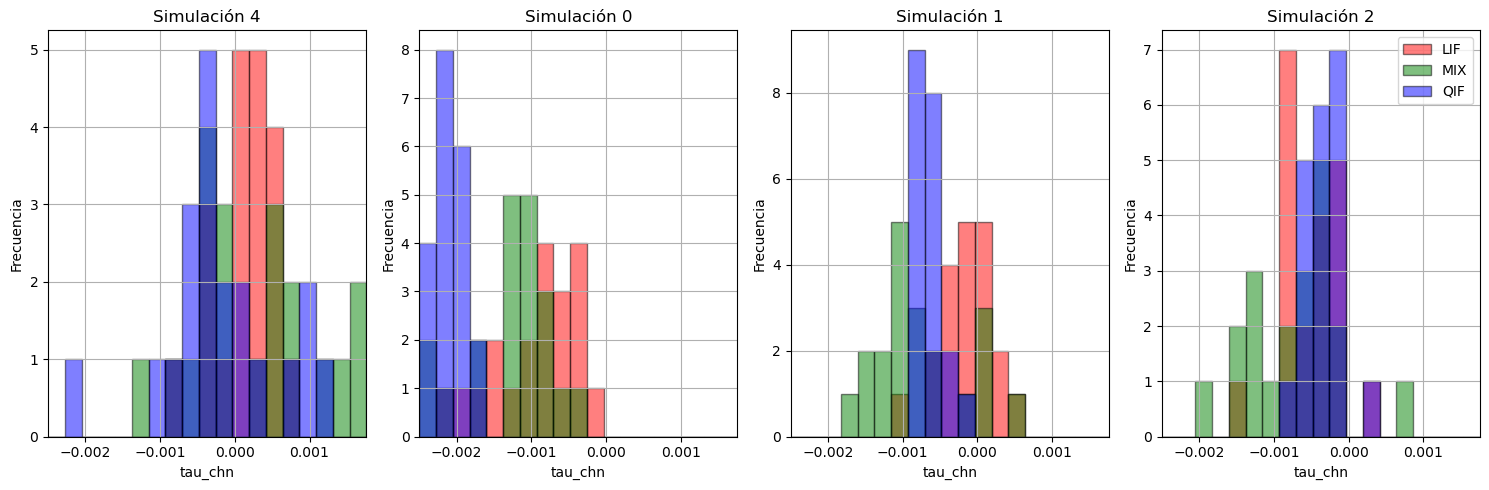

In [ ]:
tau_vect = ['tau_rec','tau_div','tau_con','tau_chn']
num_sims = [4,0,1,2]
for tau in tau_vect:

    min_val_all = np.inf
    max_val_all = -np.inf

    for j in range(len(num_sims)):
        num_sim = num_sims[j]
        nombre_archivo = f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
        data = pd.read_csv(nombre_archivo)

        # Llama a la función cargar_archivo_parametros con el nombre del archivo CSV
        nombre_carpeta = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}"
        filename_parametros = os.path.join(nombre_carpeta, f'simulacion_{num_sim}_parametros.csv')
        parametros = cargar_archivo_parametros(filename_parametros)

        # Ahora puedes acceder a los parámetros como lo harías normalmente
        N = parametros['N']
        nloop = parametros['nloop']
        cant_seed = parametros['cant_seed']

        df_nloop = data[(data['nloop'] == (nloop - 1))]
        min_val = np.min(df_nloop[tau])
        max_val = np.max(df_nloop[tau])
        min_val_all = min(min_val_all, min_val)
        max_val_all = max(max_val_all, max_val)

    num_bins = 20
    bins = np.linspace(min_val_all, max_val_all, num_bins)

    # Configurar subplots
    fig, axs = plt.subplots(1, len(num_sims), figsize=(15, 5))
    colores = ['r', 'g', 'b']

    # Generar los histogramas con los bins definidos
    for i in range(len(num_sims)):
        num_sim = num_sims[i]
        nombre_archivo = f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
        data = pd.read_csv(nombre_archivo)

        nombre_carpeta = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}"
        filename_parametros = os.path.join(nombre_carpeta, f'simulacion_{num_sim}_parametros.csv')
        parametros = cargar_archivo_parametros(filename_parametros)

        N = parametros['N']
        nloop = parametros['nloop']
        cant_seed = parametros['cant_seed']

        df_nloop = data[(data['nloop'] == (nloop - 1))]

        for pq, pqif in enumerate(pqif_vector):
            color = colores[pq]
            label = ''
            if pqif == 0:
                label = 'LIF'
            elif pqif == 0.5:
                label = 'MIX'
            elif pqif == 1:
                label = 'QIF'
            df_nloop_pqif = df_nloop[(df_nloop['pqif'] == pqif)]
            axs[i].hist(df_nloop_pqif[tau], bins, edgecolor='black', label= label, color=color, alpha=0.5)
            axs[i].grid()
            axs[i].set_title(f'Simulación {num_sim}')
            axs[i].set_xlabel(tau)
            axs[i].set_ylabel('Frecuencia')
            axs[i].set_xlim(min_val_all, max_val_all)

    # Agregar una única leyenda en el gráfico de la derecha
    axs[-1].legend(loc='upper right')
    plt.tight_layout()
    plt.show()



Text(0.5, 1.0, 'Subpoblaciones QIF LIF en el sistema MIX')

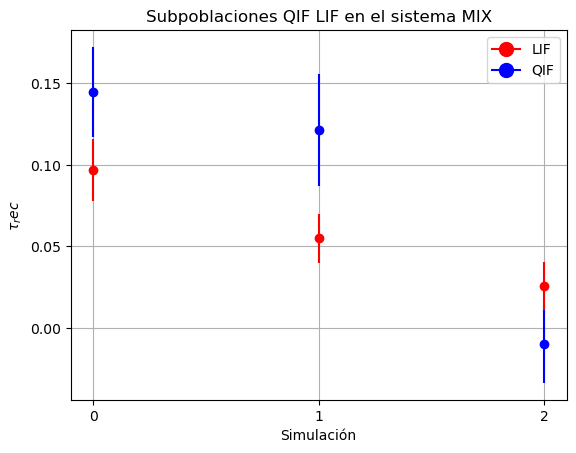

In [ ]:
# Inicializar diccionarios para almacenar los valores de tau_rec para cada cuadrante, simulación y valor de pqif
simulations = [0,1,2]
tau_rec_cuadrante1 = {sim: {} for sim in range(3)}
tau_rec_cuadrante4 = {sim: {} for sim in range(3)}

# Bucle sobre las simulaciones
for num_sim in range(3):
    pqif = 0.5

    # Inicializar listas para almacenar los valores de tau_rec para cada semilla
    tau_rec1_list = []
    tau_rec4_list = []

    # Bucle sobre las semillas
    for k in range(cant_seed):
        matrix= csv_to_matrix(f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')

        rows, cols = matrix.shape
        mid_row, mid_col = rows // 2, cols // 2

        cuadrante1 = matrix[:mid_row, :mid_col] # Cuadrante superior izquierdo
        cuadrante4 = matrix[mid_row:, mid_col:]    # Cuadrante inferior derecho
        
        # Calcular tau_rec para cada cuadrante
        _, tau_rec1, _, _, _ = motifs(cuadrante1, N/2)
        _, tau_rec4, _, _, _ = motifs(cuadrante4, N/2)

        # Guardar los valores de tau_rec para cada cuadrante
        tau_rec1_list.append(tau_rec1)
        tau_rec4_list.append(tau_rec4)

    # Guardar los valores de tau_rec para cada valor de pqif
    tau_rec_cuadrante1[num_sim] = tau_rec1_list
    tau_rec_cuadrante4[num_sim] = tau_rec4_list


# Colores para los cuadrantes
color_cuadrante1 = 'blue'
color_cuadrante4 = 'red'

# Bucle sobre las simulaciones
for num_sim in range(3):
    # Calcular la media y la desviación estándar para cada cuadrante
    mean_tau_rec1 = np.mean(tau_rec_cuadrante1[num_sim])
    std_tau_rec1 = np.std(tau_rec_cuadrante1[num_sim])
    
    mean_tau_rec4 = np.mean(tau_rec_cuadrante4[num_sim])
    std_tau_rec4 = np.std(tau_rec_cuadrante4[num_sim])

    # Graficar tau_rec para cuadrante 1
    plt.errorbar(num_sim, mean_tau_rec1, yerr=std_tau_rec1, fmt='o', color=color_cuadrante1, label='Cuadrante 1' if num_sim == 0 else "")
    # Graficar tau_rec para cuadrante 4
    plt.errorbar(num_sim, mean_tau_rec4, yerr=std_tau_rec4, fmt='o', color=color_cuadrante4, label='Cuadrante 4' if num_sim == 0 else "")

# Etiquetas y leyenda
plt.xlabel('Simulación')
plt.ylabel(r'$\tau_rec$')
plt.legend()
plt.grid(True)
plt.xticks(simulations)
# Crear leyenda personalizada para los símbolos con etiquetas asociadas a cada pqif
legend_labels = []
for pqif in [0,1]:
    label = ''
    if pqif == 0:
        label = 'LIF'
    elif pqif == 1:
        label = 'QIF'
    legend_labels.append(plt.Line2D([0], [0], marker='o', color=colores[pqif_vector.index(pqif)], label=f'{label}', markersize=10))


plt.legend(handles=legend_labels, loc='upper right')
plt.title('Subpoblaciones QIF LIF en el sistema MIX')


3


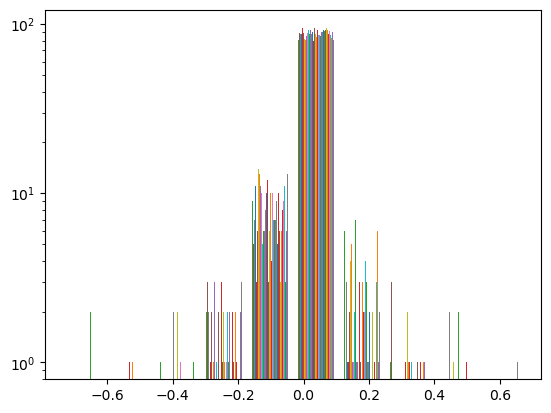

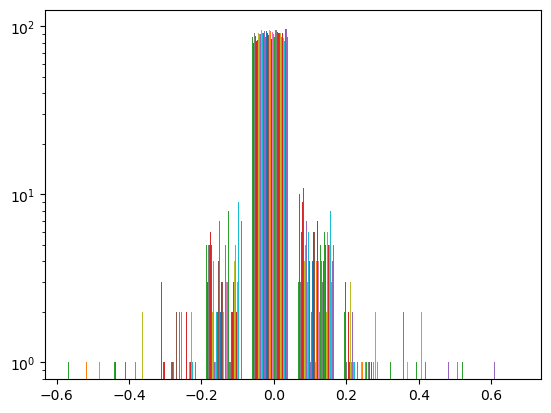

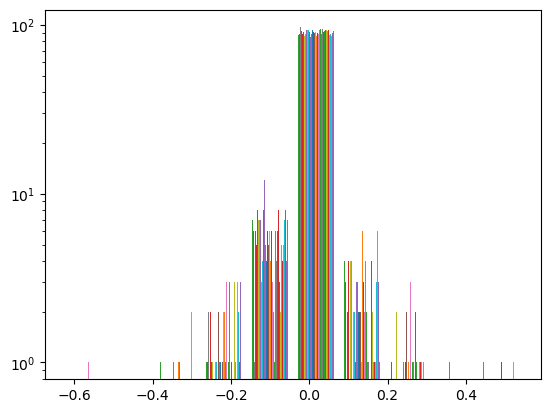

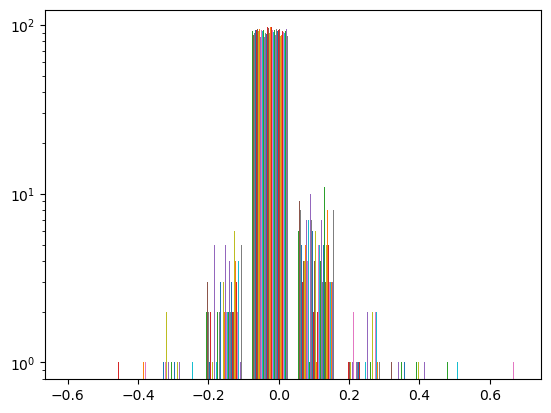

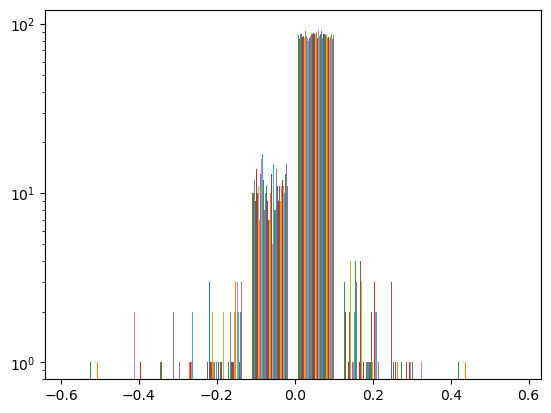

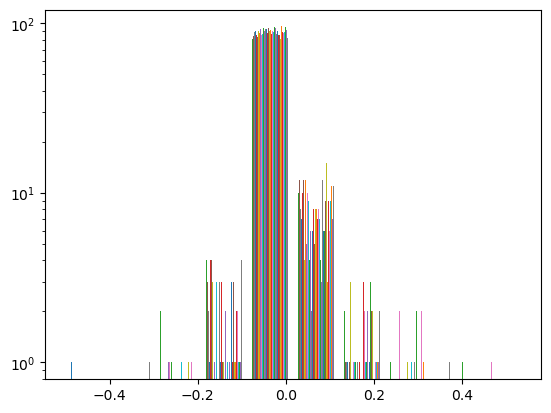

KeyboardInterrupt: 

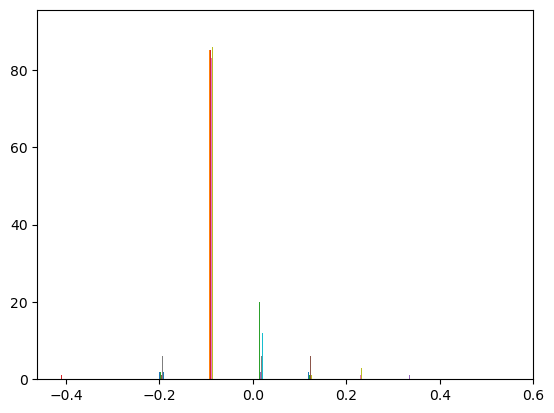

In [123]:
# Definir las frecuencias para cada simulación
frecuencias = {
    0: {'fb': 1, 'fa': 5},
    1: {'fb': 2, 'fa': 10},
    2: {'fb': 3, 'fa': 15},
    3: {'fb': 0.5, 'fa': 2.5},
    4: {'fb': 0.25, 'fa': 1.25}
}
print(frecuencias[2]['fb'])

# Definir los tipos de tau a calcular
tau_vect = ['tau_rec', 'tau_div', 'tau_con', 'tau_chn']
pqif_vector = [0, 0.5]
num_sims = [0, 1, 2, 4, 3]
# Bucle sobre los tipos de tau
for tau in tau_vect:
    # Inicializar diccionarios para almacenar los valores de tau para cada cuadrante, simulación y valor de pqif
    tau_cuadrante1 = {sim: {} for sim in range(len(num_sims))}
    tau_cuadrante4 = {sim: {} for sim in range(len(num_sims))}

    # Bucle sobre las simulaciones
    for index in range(len(num_sims)):
        num_sim = num_sims[index]
        # Leer el archivo que contiene las frecuencias de los targets de cada neurona
        nombre_archivo_frecuencias = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_targets.csv"
        frecuencias_data = pd.read_csv(nombre_archivo_frecuencias)

        # Extraer los valores únicos de frecuencia
        valores_frecuencia = frecuencias_data['romega'].unique()
        valores_frecuencia = sorted(valores_frecuencia)

        # Crear un diccionario para almacenar las neuronas asociadas a cada frecuencia
        neuronas_por_frecuencia = {frecuencia: frecuencias_data[frecuencias_data['romega'] == frecuencia]['Neurona'].tolist() for frecuencia in valores_frecuencia}

        # Concatenar los vectores de índices de las neuronas para ambas frecuencias
        indices_frecuencia_1 = neuronas_por_frecuencia[valores_frecuencia[0]]
        indices_frecuencia_2 = neuronas_por_frecuencia[valores_frecuencia[1]]
        indices_concatenados = indices_frecuencia_1 + indices_frecuencia_2

        # Bucle sobre los valores de pqif
        for pqif, color in zip(pqif_vector, colores):

            # Inicializar listas para almacenar los valores de tau para cada semilla
            tau_list_cuadrante1 = []
            tau_list_cuadrante4 = []

            # Bucle sobre las semillas
            for k in range(cant_seed):
                matrix_ = csv_to_matrix(f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')

                matrix = np.zeros((N, N))

                for i in range(N):
                    for j in range(N):
                        matrix[i,j] = matrix_[indices_concatenados[i], indices_concatenados[j]]

                rows, cols = matrix.shape
                mid_row, mid_col = rows // 2, cols // 2

                cuadrante1 = matrix[:mid_row, :mid_col] # Cuadrante superior izquierdo
                cuadrante4 = matrix[mid_row:, mid_col:]    # Cuadrante inferior derecho

                # Calcular tau para cada cuadrante
                sigma21, tau1, tau_div1, tau_con1, tau_chn1 = motifs(cuadrante1, N/2)
                sigma24, tau4, tau_div4, tau_con4, tau_chn4 = motifs(cuadrante4, N/2)

                # Guardar los valores de tau según la opción tau que se está iterando
                if tau == 'tau_rec':
                    tau_list_cuadrante1.append(tau1)
                    tau_list_cuadrante4.append(tau4)
                elif tau == 'tau_div':
                    tau_list_cuadrante1.append(tau_div1)
                    tau_list_cuadrante4.append(tau_div4)
                elif tau == 'tau_con':
                    tau_list_cuadrante1.append(tau_con1)
                    tau_list_cuadrante4.append(tau_con4)
                elif tau == 'tau_chn':
                    tau_list_cuadrante1.append(tau_chn1)
                    tau_list_cuadrante4.append(tau_chn4)
                
            # Guardar los valores de tau para cada valor de pqif
            tau_cuadrante1[index][pqif] = tau_list_cuadrante1
            tau_cuadrante4[index][pqif] = tau_list_cuadrante4

    # Calcular la media y la desviación estándar para cada cuadrante, simulación y valor de pqif
    media_tau_cuadrante1 = {sim: {pqif: np.mean(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante1.items()}
    std_tau_cuadrante1 = {sim: {pqif: np.std(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante1.items()}
    media_tau_cuadrante4 = {sim: {pqif: np.mean(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante4.items()}
    std_tau_cuadrante4 = {sim: {pqif: np.std(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante4.items()}

    # Graficar la media de tau para cada cuadrante en función de las frecuencias asociadas
    plt.figure(figsize=(12, 8))

    for index_ in range(len(num_sims)):
        for pqif, color in zip(pqif_vector, colores):

            plt.errorbar(frecuencias[index_]['fb'], media_tau_cuadrante1[index_][pqif], yerr=std_tau_cuadrante1[index_][pqif], fmt='o', color=color, label=f'Simulación {index_ + 1}, Cuadrante 1, pqif={pqif}')
            plt.errorbar(frecuencias[index_]['fa'], media_tau_cuadrante4[index_][pqif], yerr=std_tau_cuadrante4[index_][pqif], fmt='o', color=color, label=f'Simulación {index_ + 1}, Cuadrante 4, pqif={pqif}')

    plt.xlabel(r'$\omega_{Targets}$')
    plt.ylabel(f'${tau}$')

    plt.grid(True)

    # Crear leyenda personalizada para los símbolos con etiquetas asociadas a cada pqif
    legend_labels = []
    for pqif in pqif_vector:
        label = ''
        if pqif == 0:
            label = 'LIF'
        elif pqif == 0.5:
            label = 'MIX'
        elif pqif == 1:
            label = 'QIF'
        legend_labels.append(plt.Line2D([0], [0], marker='o', color=colores[pqif_vector.index(pqif)], label=f'{label}', markersize=10))

    plt.legend(handles=legend_labels, loc='upper right')

    plt.show()


3


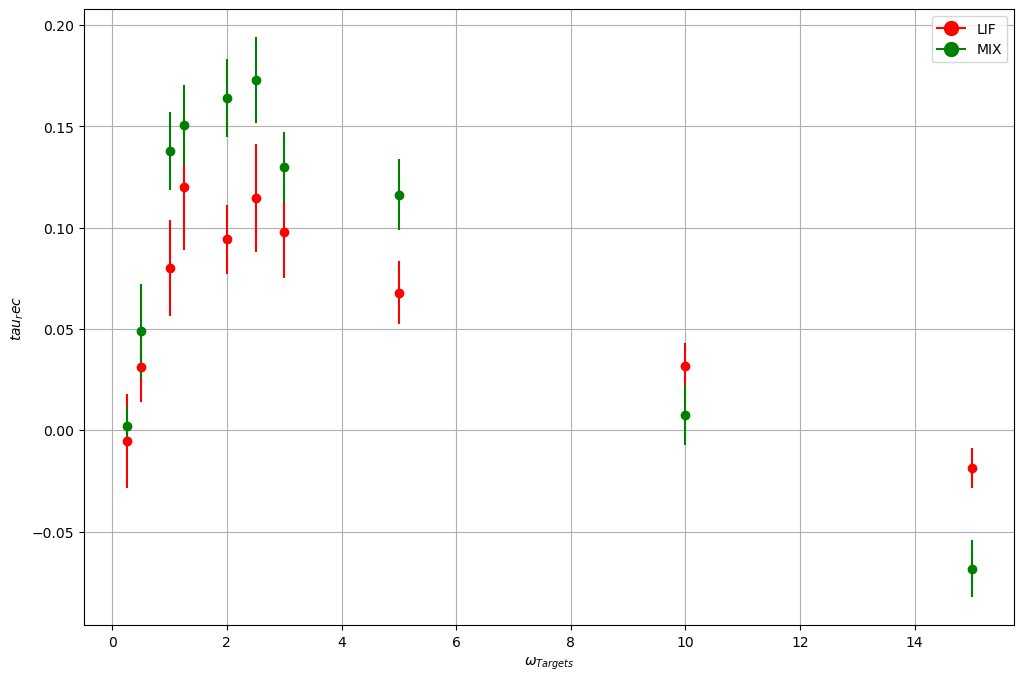

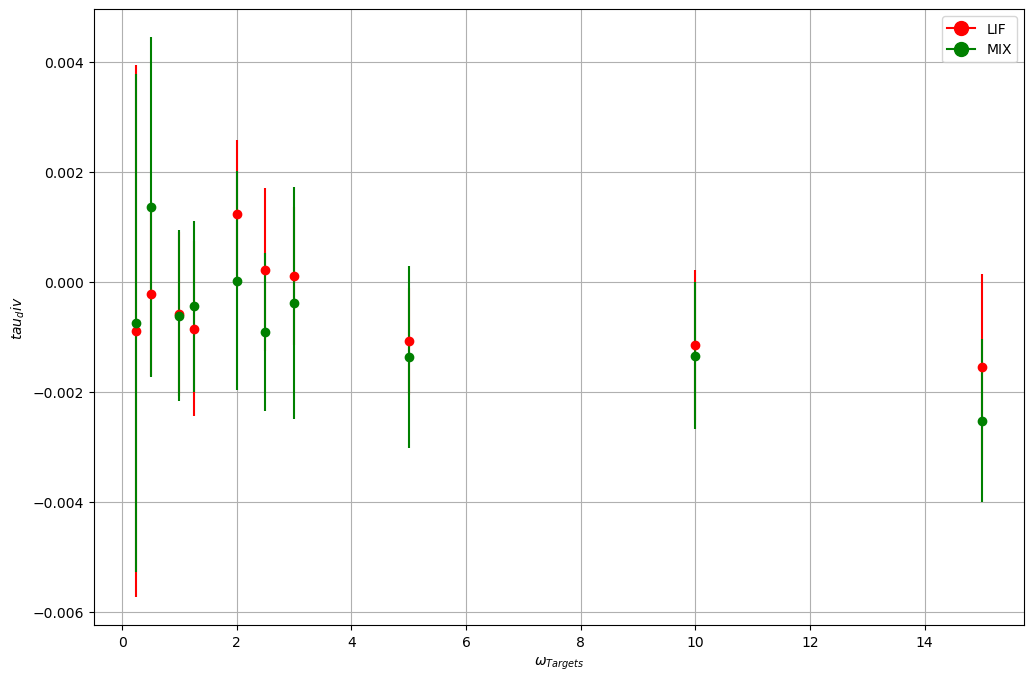

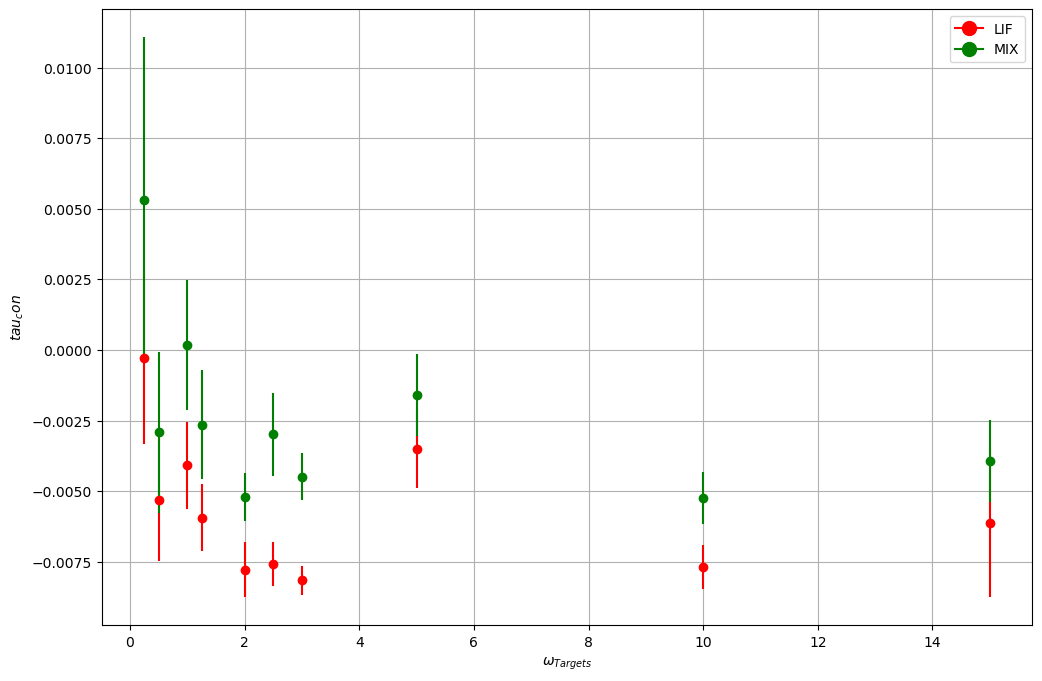

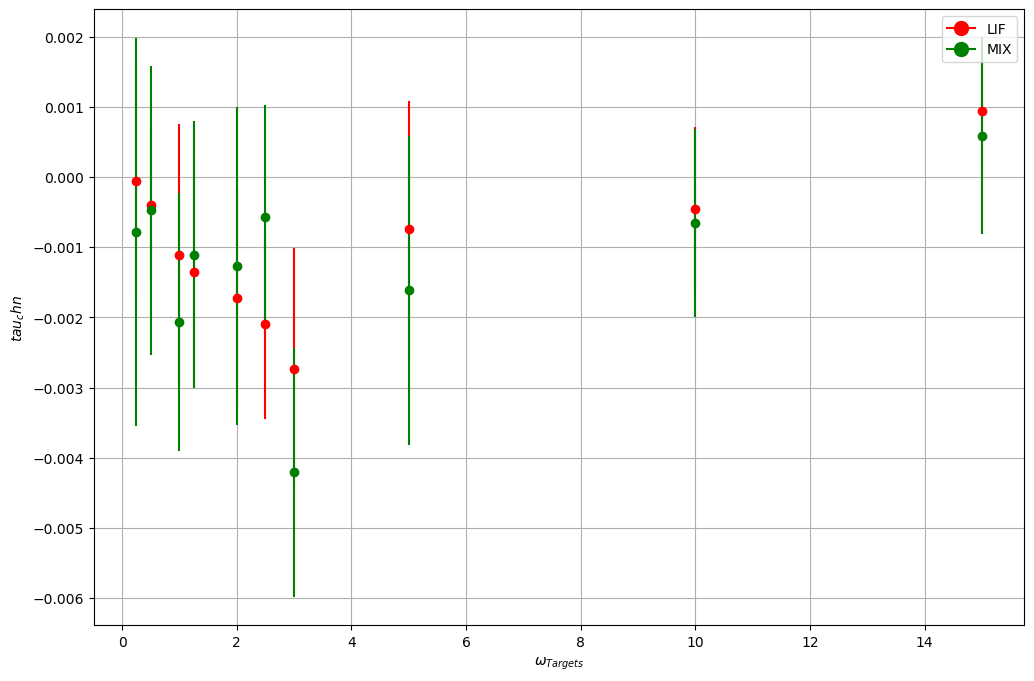

In [ ]:
# Definir las frecuencias para cada simulación
frecuencias = {
    0: {'fb': 1, 'fa': 5},
    1: {'fb': 2, 'fa': 10},
    2: {'fb': 3, 'fa': 15},
    3: {'fb': 0.5, 'fa': 2.5},
    4: {'fb': 0.25, 'fa': 1.25}
}
print(frecuencias[2]['fb'])

# Definir los tipos de tau a calcular
tau_vect = ['tau_rec', 'tau_div', 'tau_con', 'tau_chn']
pqif_vector = [0, 0.5]
num_sims = [0, 1, 2, 4, 3]
# Bucle sobre los tipos de tau
for tau in tau_vect:
    # Inicializar diccionarios para almacenar los valores de tau para cada cuadrante, simulación y valor de pqif
    tau_cuadrante1 = {sim: {} for sim in range(len(num_sims))}
    tau_cuadrante4 = {sim: {} for sim in range(len(num_sims))}

    # Bucle sobre las simulaciones
    for index in range(len(num_sims)):
        num_sim = num_sims[index]
        # Leer el archivo que contiene las frecuencias de los targets de cada neurona
        nombre_archivo_frecuencias = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_targets.csv"
        frecuencias_data = pd.read_csv(nombre_archivo_frecuencias)

        # Extraer los valores únicos de frecuencia
        valores_frecuencia = frecuencias_data['romega'].unique()
        valores_frecuencia = sorted(valores_frecuencia)

        # Crear un diccionario para almacenar las neuronas asociadas a cada frecuencia
        neuronas_por_frecuencia = {frecuencia: frecuencias_data[frecuencias_data['romega'] == frecuencia]['Neurona'].tolist() for frecuencia in valores_frecuencia}

        # Concatenar los vectores de índices de las neuronas para ambas frecuencias
        indices_frecuencia_1 = neuronas_por_frecuencia[valores_frecuencia[0]]
        indices_frecuencia_2 = neuronas_por_frecuencia[valores_frecuencia[1]]
        indices_concatenados = indices_frecuencia_1 + indices_frecuencia_2

        # Bucle sobre los valores de pqif
        for pqif, color in zip(pqif_vector, colores):

            # Inicializar listas para almacenar los valores de tau para cada semilla
            tau_list_cuadrante1 = []
            tau_list_cuadrante4 = []

            # Bucle sobre las semillas
            for k in range(cant_seed):
                matrix_ = csv_to_matrix(f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')

                matrix = np.zeros((N, N))

                for i in range(N):
                    for j in range(N):
                        matrix[i,j] = matrix_[indices_concatenados[i], indices_concatenados[j]]

                rows, cols = matrix.shape
                mid_row, mid_col = rows // 2, cols // 2

                cuadrante1 = matrix[:mid_row, :mid_col] # Cuadrante superior izquierdo
                cuadrante4 = matrix[mid_row:, mid_col:]    # Cuadrante inferior derecho

                # Calcular tau para cada cuadrante
                sigma21, tau1, tau_div1, tau_con1, tau_chn1 = motifs(cuadrante1, N/2)
                sigma24, tau4, tau_div4, tau_con4, tau_chn4 = motifs(cuadrante4, N/2)

                # Guardar los valores de tau según la opción tau que se está iterando
                if tau == 'tau_rec':
                    tau_list_cuadrante1.append(tau1)
                    tau_list_cuadrante4.append(tau4)
                elif tau == 'tau_div':
                    tau_list_cuadrante1.append(tau_div1)
                    tau_list_cuadrante4.append(tau_div4)
                elif tau == 'tau_con':
                    tau_list_cuadrante1.append(tau_con1)
                    tau_list_cuadrante4.append(tau_con4)
                elif tau == 'tau_chn':
                    tau_list_cuadrante1.append(tau_chn1)
                    tau_list_cuadrante4.append(tau_chn4)
                
            # Guardar los valores de tau para cada valor de pqif
            tau_cuadrante1[index][pqif] = tau_list_cuadrante1
            tau_cuadrante4[index][pqif] = tau_list_cuadrante4

    # Calcular la media y la desviación estándar para cada cuadrante, simulación y valor de pqif
    media_tau_cuadrante1 = {sim: {pqif: np.mean(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante1.items()}
    std_tau_cuadrante1 = {sim: {pqif: np.std(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante1.items()}
    media_tau_cuadrante4 = {sim: {pqif: np.mean(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante4.items()}
    std_tau_cuadrante4 = {sim: {pqif: np.std(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante4.items()}

    # Graficar la media de tau para cada cuadrante en función de las frecuencias asociadas
    plt.figure(figsize=(12, 8))

    for index_ in range(len(num_sims)):
        for pqif, color in zip(pqif_vector, colores):
            

            plt.errorbar(frecuencias[index_]['fb'], media_tau_cuadrante1[index_][pqif], yerr=std_tau_cuadrante1[index_][pqif], fmt='o', color=color, label=f'Simulación {index_ + 1}, Cuadrante 1, pqif={pqif}')
            plt.errorbar(frecuencias[index_]['fa'], media_tau_cuadrante4[index_][pqif], yerr=std_tau_cuadrante4[index_][pqif], fmt='o', color=color, label=f'Simulación {index_ + 1}, Cuadrante 4, pqif={pqif}')

    plt.xlabel(r'$\omega_{Targets}$')
    plt.ylabel(f'${tau}$')

    plt.grid(True)

    # Crear leyenda personalizada para los símbolos con etiquetas asociadas a cada pqif
    legend_labels = []
    for pqif in pqif_vector:
        label = ''
        if pqif == 0:
            label = 'LIF'
        elif pqif == 0.5:
            label = 'MIX'
        elif pqif == 1:
            label = 'QIF'
        legend_labels.append(plt.Line2D([0], [0], marker='o', color=colores[pqif_vector.index(pqif)], label=f'{label}', markersize=10))

    plt.legend(handles=legend_labels, loc='upper right')

    plt.show()


100 len
100 len
100 len
100 len
100 len
100 len
100 len
100 len


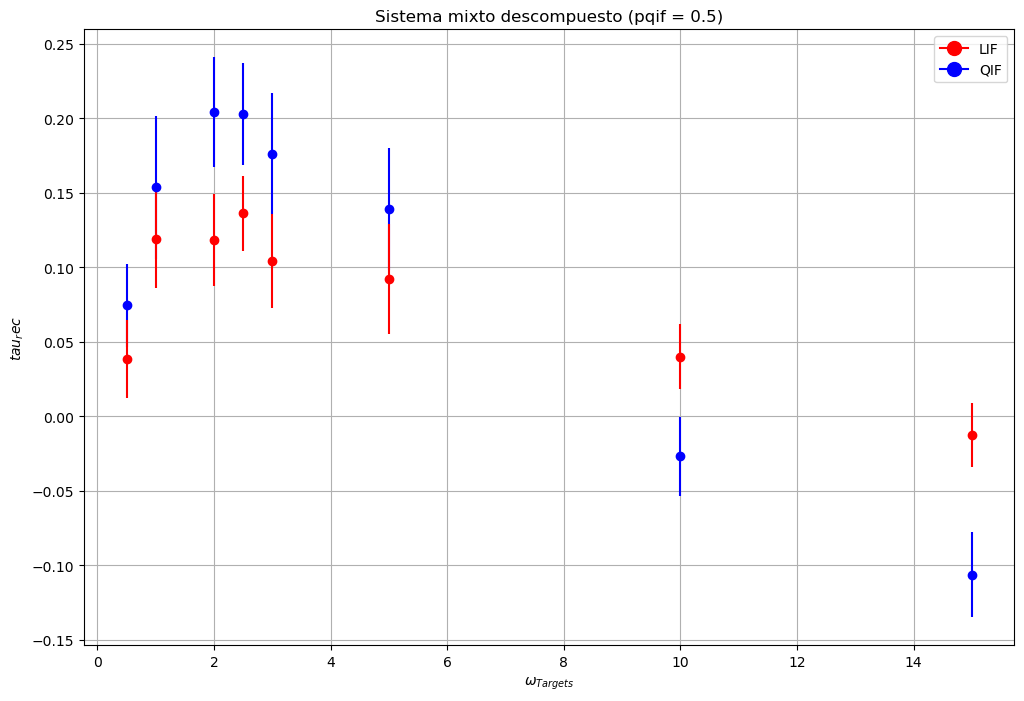

In [ ]:
# Definir las frecuencias para cada simulación
frecuencias = {
    0: {'fb': 1, 'fa': 5},
    1: {'fb': 2, 'fa': 10},
    2: {'fb': 3, 'fa': 15},
    3: {'fb': 0.5, 'fa': 2.5},
}


num_sims = [0,1,2,4]

tau = 'tau_rec'
pqif_vector = [0.5]


plt.figure(figsize=(12, 8))

for index_frec in [0,1]:
    tau_cuadrante1 = {sim: {} for sim in range(len(num_sims))}
    tau_cuadrante4 = {sim: {} for sim in range(len(num_sims))}

    # Bucle sobre las simulaciones
    for index in range(len(num_sims)):
        num_sim = num_sims[index]
        # Leer el archivo que contiene las frecuencias de los targets de cada neurona
        nombre_archivo_frecuencias = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_targets.csv"
        frecuencias_data = pd.read_csv(nombre_archivo_frecuencias)

        # Extraer los valores únicos de frecuencia
        valores_frecuencia = frecuencias_data['romega'].unique()
        valores_frecuencia = sorted(valores_frecuencia)

        # Crear un diccionario para almacenar las neuronas asociadas a cada frecuencia
        neuronas_por_frecuencia = {frecuencia: frecuencias_data[frecuencias_data['romega'] == frecuencia]['Neurona'].tolist() for frecuencia in valores_frecuencia}

        # Concatenar los vectores de índices de las neuronas para ambas frecuencias
        indices_frecuencia = neuronas_por_frecuencia[valores_frecuencia[index_frec]]


        indices_frecuencia_QIF = []
        indices_frecuencia_LIF = []

        
        print(len(indices_frecuencia_1), 'len')
        
        for m in range(len(indices_frecuencia)):
            if(indices_frecuencia[m] <= N/2):
                indices_frecuencia_QIF.append(indices_frecuencia[m])
            else:
                indices_frecuencia_LIF.append(indices_frecuencia[m])

        indices_concatenados = indices_frecuencia_QIF + indices_frecuencia_LIF

        # Bucle sobre los valores de pqif
        for pqif, color in zip(pqif_vector, colores):

            # Inicializar listas para almacenar los valores de tau para cada semilla
            tau_list_cuadrante1 = []
            tau_list_cuadrante4 = []

            # Bucle sobre las semillas
            for k in range(cant_seed):
                matrix_ = csv_to_matrix(f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
                N2 = int(N/2)
                
                matrix = np.zeros((N2, N2))

                for i in range(N2):
                    for j in range(N2):
                        matrix[i,j] = matrix_[indices_concatenados[i], indices_concatenados[j]]

                rows, cols = matrix.shape
                mid_row, mid_col = rows // 2, cols // 2

                cuadrante1 = matrix[:mid_row, :mid_col] # Cuadrante superior izquierdo
                cuadrante4 = matrix[mid_row:, mid_col:]    # Cuadrante inferior derecho

                # Calcular tau para cada cuadrante
                sigma21, tau1, tau_div1, tau_con1, tau_chn1 = motifs(cuadrante1, N2/2)
                sigma24, tau4, tau_div4, tau_con4, tau_chn4 = motifs(cuadrante4, N2/2)

                # Guardar los valores de tau según la opción tau que se está iterando
                if tau == 'tau_rec':
                    tau_list_cuadrante1.append(tau1)
                    tau_list_cuadrante4.append(tau4)
                elif tau == 'tau_div':
                    tau_list_cuadrante1.append(tau_div1)
                    tau_list_cuadrante4.append(tau_div4)
                elif tau == 'tau_con':
                    tau_list_cuadrante1.append(tau_con1)
                    tau_list_cuadrante4.append(tau_con4)
                elif tau == 'tau_chn':
                    tau_list_cuadrante1.append(tau_chn1)
                    tau_list_cuadrante4.append(tau_chn4)
                
            # Guardar los valores de tau para cada valor de pqif
            tau_cuadrante1[index][pqif] = tau_list_cuadrante1
            tau_cuadrante4[index][pqif] = tau_list_cuadrante4

    # Calcular la media y la desviación estándar para cada cuadrante, simulación y valor de pqif
    media_tau_cuadrante1 = {sim: {pqif: np.mean(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante1.items()}
    std_tau_cuadrante1 = {sim: {pqif: np.std(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante1.items()}
    media_tau_cuadrante4 = {sim: {pqif: np.mean(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante4.items()}
    std_tau_cuadrante4 = {sim: {pqif: np.std(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante4.items()}


    f = ['fb', 'fa']
    for index_ in range(len(num_sims)):

        plt.errorbar(frecuencias[index_][f[index_frec]], media_tau_cuadrante1[index_][pqif], yerr=std_tau_cuadrante1[index_][pqif], fmt='o', color=colores[2], label=f'Simulación {index_ + 1}, Cuadrante 1')
        plt.errorbar(frecuencias[index_][f[index_frec]], media_tau_cuadrante4[index_][pqif], yerr=std_tau_cuadrante4[index_][pqif], fmt='o', color=colores[0], label=f'Simulación {index_ + 1}, Cuadrante 4, pqif={pqif}')

    plt.xlabel(r'$\omega_{Targets}$')
    plt.ylabel(f'${tau}$')

    plt.grid(True)

# Crear leyenda personalizada para los símbolos con etiquetas asociadas a cada pqif
legend_labels = []
colors = ['r', 'b']
pqif_aux = [0,1]
for pqif in pqif_aux:
    label = ''
    if pqif == 0:
        label = 'LIF'
    elif pqif == 1:
        label = 'QIF'
    legend_labels.append(plt.Line2D([0], [0], marker='o', color=colors[pqif_aux.index(pqif)], label=f'{label}', markersize=10))

plt.legend(handles=legend_labels, loc='upper right')

plt.title('Sistema mixto descompuesto (pqif = 0.5)')

plt.show()

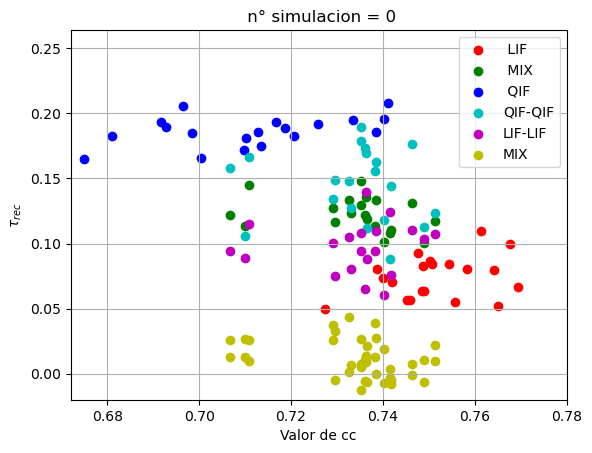

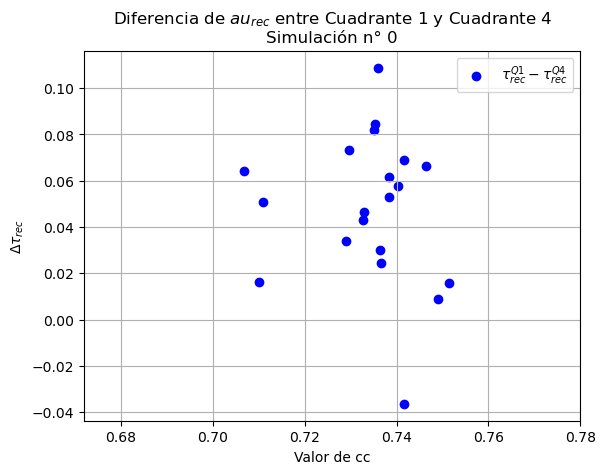

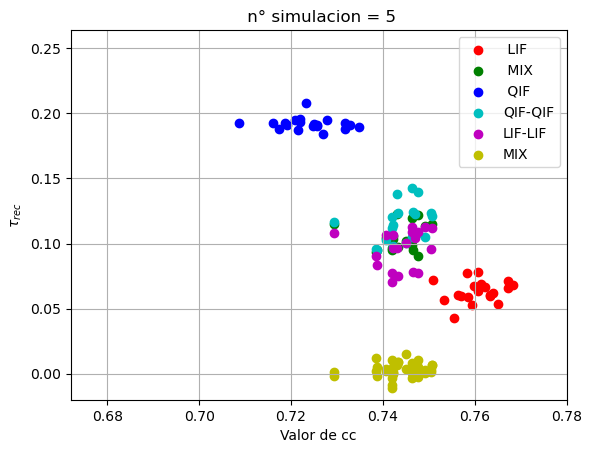

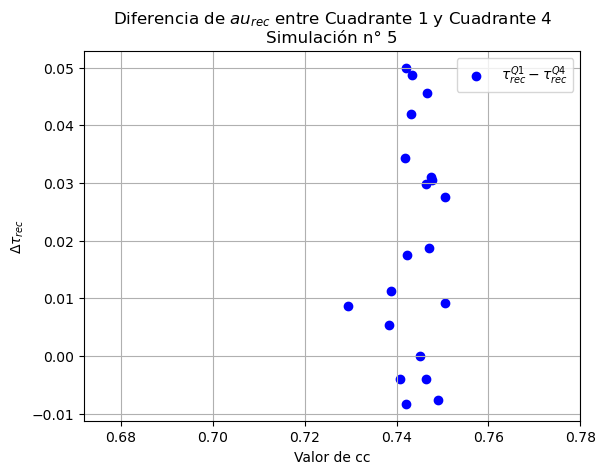

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Obtener los colores para cada valor único de 'pqif'
colores = ['r', 'g', 'b']


# Inicializa las variables y estructuras de datos necesarias
simulations = [0,5]
# Inicializar listas para almacenar los valores de tau_rec para cada cuadrante y simulación

# Bucle sobre las simulaciones
for num_sim in simulations:

    nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Filtrar los datos para nloop = 9
    data_nloop_11 = data[data['nloop'] == 10]

    # Obtener los valores únicos de 'pqif' para esta simulación
    pqif_values = data_nloop_11['pqif'].unique()

    # Iterar sobre cada valor único de 'pqif'
    for i, pqif_value in enumerate(pqif_values):
        # Filtrar los datos para este valor de 'pqif'
        data_pqif = data_nloop_11[data_nloop_11['pqif'] == pqif_value]

        # Obtener los valores de tau_rec y cc para este valor de 'pqif'
        tau_rec_values = data_pqif['tau_rec']
        cc_values = data_pqif['cc']

        if pqif_value == 0:
            label = 'LIF'
        elif pqif_value == 0.5:
            label = 'MIX'
        elif pqif_value == 1:
            label = 'QIF'

        # Graficar tau_rec vs cc para este valor de 'pqif'
        plt.scatter(cc_values, tau_rec_values, label=f' {label}', color=colores[i])
        plt.title(f' n° simulacion = {num_sim}')


        plt.xlabel('CC')
        plt.ylabel('Tau_rec')

        # Ajustar el diseño del subplot
        plt.grid(True)


        if i == 2:
            plt.legend()
    plt.xlim(0.672, 0.78)
    plt.ylim(-0.02, 0.264)
    


    pqif = 0.5
    tau_rec_cuadrante1 = []
    tau_rec_cuadrante2 = []
    tau_rec_cuadrante3 = []
    tau_rec_cuadrante4 = []
    
    cant_seed = 20
    cc_values = []

    # Bucle sobre las semillas
    for k in range(cant_seed):
        # Simular y calcular tau_rec para cada cuadrante
        matrix = csv_to_matrix(f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
        rows, cols = matrix.shape
        mid_row, mid_col = rows // 2, cols // 2
        cuadrante1 = matrix[:mid_row, :mid_col]
        cuadrante2 = matrix[:mid_row, mid_col:]
        cuadrante3 = matrix[mid_row:, :mid_col]
        cuadrante4 = matrix[mid_row:, mid_col:]
        
        _, tau_rec1, _, _, _ = motifs(cuadrante1, N/2)
        _, tau_rec2, _, _, _ = motifs(cuadrante2, N/2)
        _, tau_rec3, _, _, _ = motifs(cuadrante3, N/2)
        _, tau_rec4, _, _, _ = motifs(cuadrante4, N/2)
        
        # Guardar los valores de tau_rec y cc para cada cuadrante
        tau_rec_cuadrante1.append(tau_rec1)
        tau_rec_cuadrante2.append(tau_rec2)
        tau_rec_cuadrante3.append(tau_rec3)
        tau_rec_cuadrante4.append(tau_rec4)

        # Obtener los valores de cc para esta semilla desde el archivo de resultados
        nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
        data = pd.read_csv(nombre_archivo)
        data_select = data[(data['pqif'] == 0.5) & (data['nloop'] == 10) & (data['seed'] == k)]
        cc_values.append(data_select['cc'].values[0])

    # Convertir las listas a arrays de numpy para facilitar el manejo de los datos
    tau_rec_cuadrante1 = np.array(tau_rec_cuadrante1)
    tau_rec_cuadrante2 = np.array(tau_rec_cuadrante2)
    tau_rec_cuadrante3 = np.array(tau_rec_cuadrante3)
    tau_rec_cuadrante4 = np.array(tau_rec_cuadrante4)
    cc_values = np.array(cc_values)

    # Graficar tau_rec para todos los cuadrantes en función de cc
    plt.scatter(cc_values, tau_rec_cuadrante1, color='c', label='QIF-QIF')
    plt.scatter(cc_values, tau_rec_cuadrante4, color='m', label='LIF-LIF')
    plt.scatter(cc_values, tau_rec_cuadrante2, color='y', label='MIX')
    plt.scatter(cc_values, tau_rec_cuadrante3, color='y')
    plt.title(f' n° simulacion = {num_sim}')

    plt.xlim(0.672, 0.78)
    # Etiquetas y leyenda
    plt.xlabel('Valor de cc')
    plt.ylabel(r'$\tau_{rec}$')
    plt.legend()
    plt.grid(True)
    plt.ylim(-0.02, 0.264)
    plt.show()



    # Listas para almacenar los valores de tau_rec y cc
    tau_rec_cuadrante1 = []
    tau_rec_cuadrante2 = []
    tau_rec_cuadrante3 = []
    tau_rec_cuadrante4 = []
    cc_values = []




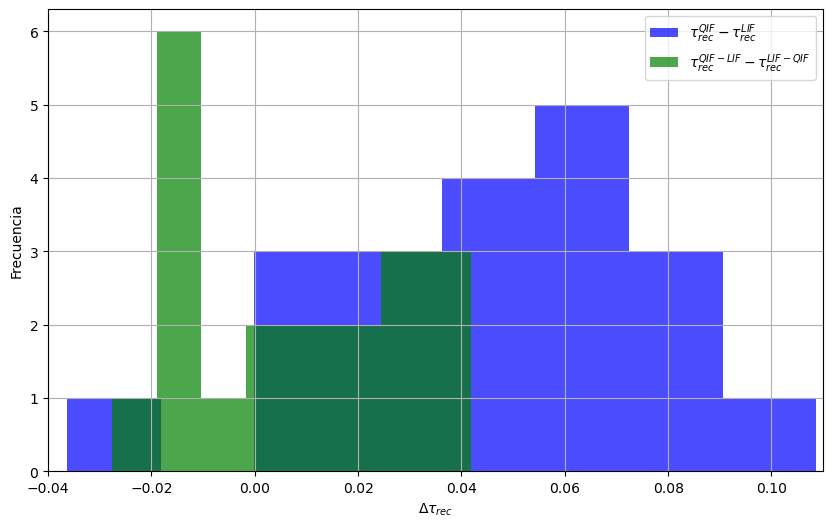

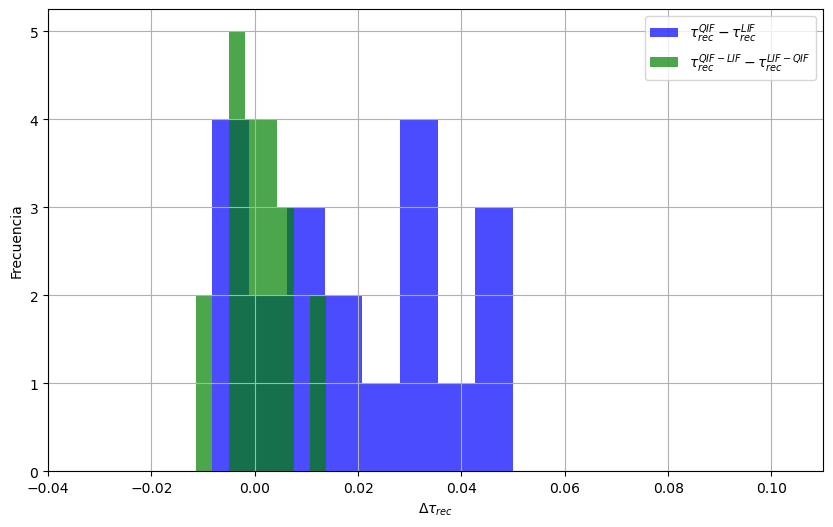

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supongo que las funciones csv_to_matrix y motifs están definidas correctamente
# Aquí debes definirlas o importarlas según corresponda

# Inicializa las variables y estructuras de datos necesarias
simulations = [0, 5]
cant_seed = 20
pqif = 0.5

# Bucle sobre las simulaciones
for num_sim in simulations:
    tau_rec_cuadrante1 = []
    tau_rec_cuadrante2 = []
    tau_rec_cuadrante3 = []
    tau_rec_cuadrante4 = []

    # Bucle sobre las semillas
    for k in range(cant_seed):
        # Leer y procesar la matriz de pesos para cada semilla
        matrix = csv_to_matrix(f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
        rows, cols = matrix.shape
        mid_row, mid_col = rows // 2, cols // 2

        cuadrante1 = matrix[:mid_row, :mid_col]
        cuadrante2 = matrix[:mid_row, mid_col:]
        cuadrante3 = matrix[mid_row:, :mid_col]
        cuadrante4 = matrix[mid_row:, mid_col:]

        _, tau_rec1, _, _, _ = motifs(cuadrante1, N/2)
        _, tau_rec2, _, _, _ = motifs(cuadrante2, N/2)
        _, tau_rec3, _, _, _ = motifs(cuadrante3, N/2)
        _, tau_rec4, _, _, _ = motifs(cuadrante4, N/2)

        tau_rec_cuadrante1.append(tau_rec1)
        tau_rec_cuadrante2.append(tau_rec2)
        tau_rec_cuadrante3.append(tau_rec3)
        tau_rec_cuadrante4.append(tau_rec4)

        # Obtener los valores de cc para esta semilla desde el archivo de resultados
        nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
        data = pd.read_csv(nombre_archivo)
        data_select = data[(data['pqif'] == 0.5) & (data['nloop'] == 10) & (data['seed'] == k)]

    # Convertir las listas a arrays de numpy para facilitar el manejo de los datos
    tau_rec_cuadrante1 = np.array(tau_rec_cuadrante1)
    tau_rec_cuadrante2 = np.array(tau_rec_cuadrante2)
    tau_rec_cuadrante3 = np.array(tau_rec_cuadrante3)
    tau_rec_cuadrante4 = np.array(tau_rec_cuadrante4)
    cc_values = np.array(cc_values)

    # Calcular la diferencia entre tau_rec_cuadrante1 y tau_rec_cuadrante4
    tau_rec_diff_1_4 = tau_rec_cuadrante1 - tau_rec_cuadrante4
    tau_rec_diff_2_3 = tau_rec_cuadrante2 - tau_rec_cuadrante3

    # Graficar los histogramas de las diferencias de tau_rec
    plt.figure(figsize=(10, 6))
    plt.hist(tau_rec_diff_1_4, bins=8, color='b', alpha=0.7, label=r'$\tau_{rec}^{QIF} - \tau_{rec}^{LIF}$')
    plt.hist(tau_rec_diff_2_3, bins=8, color='g', alpha=0.7, label=r'$\tau_{rec}^{QIF-LIF} - \tau_{rec}^{LIF-QIF}$')
    plt.xlim(-0.04, 0.11)
    plt.xlabel(r'$\Delta \tau_{rec}$')
    plt.ylabel('Frecuencia')

    plt.legend()
    plt.grid(True)
    plt.show()


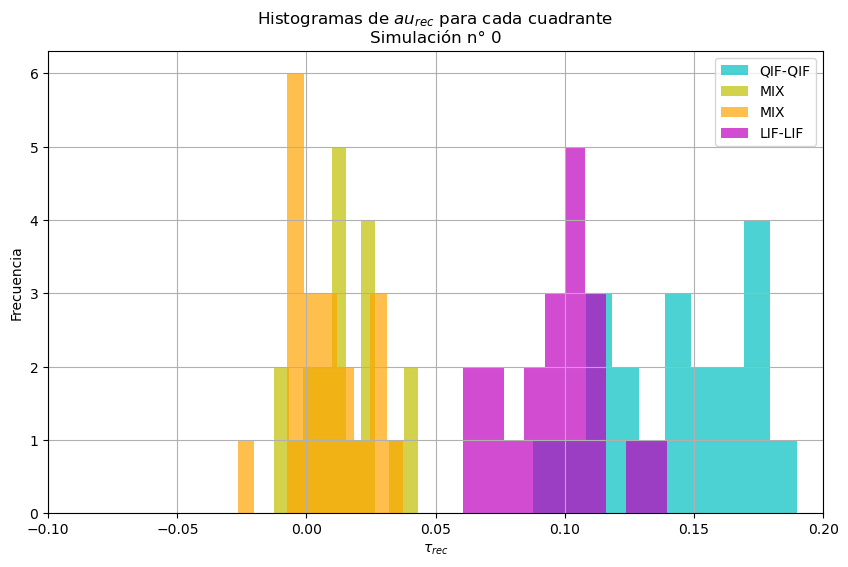

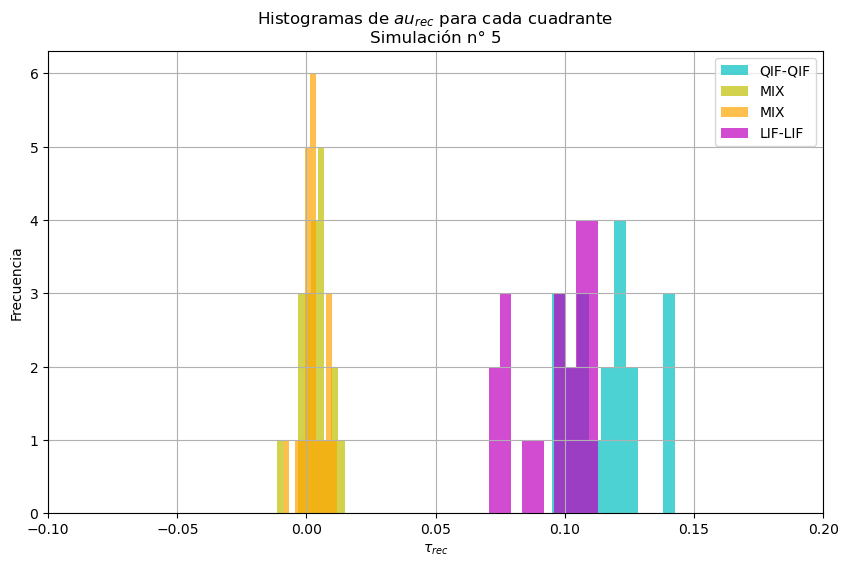

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supongo que las funciones csv_to_matrix y motifs están definidas correctamente
# Aquí debes definirlas o importarlas según corresponda

# Inicializa las variables y estructuras de datos necesarias
simulations = [0, 5]
cant_seed = 20
pqif = 0.5

# Bucle sobre las simulaciones
for num_sim in simulations:
    tau_rec_cuadrante1 = []
    tau_rec_cuadrante2 = []
    tau_rec_cuadrante3 = []
    tau_rec_cuadrante4 = []

    # Bucle sobre las semillas
    for k in range(cant_seed):
        # Leer y procesar la matriz de pesos para cada semilla
        matrix = csv_to_matrix(f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
        rows, cols = matrix.shape
        mid_row, mid_col = rows // 2, cols // 2

        cuadrante1 = matrix[:mid_row, :mid_col]
        cuadrante2 = matrix[:mid_row, mid_col:]
        cuadrante3 = matrix[mid_row:, :mid_col]
        cuadrante4 = matrix[mid_row:, mid_col:]

        _, tau_rec1, _, _, _ = motifs(cuadrante1, N/2)
        _, tau_rec2, _, _, _ = motifs(cuadrante2, N/2)
        _, tau_rec3, _, _, _ = motifs(cuadrante3, N/2)
        _, tau_rec4, _, _, _ = motifs(cuadrante4, N/2)

        # Guardar los valores de tau_rec para cada cuadrante
        tau_rec_cuadrante1.append(tau_rec1)
        tau_rec_cuadrante2.append(tau_rec2)
        tau_rec_cuadrante3.append(tau_rec3)
        tau_rec_cuadrante4.append(tau_rec4)

    # Convertir las listas a arrays de numpy para facilitar el manejo de los datos
    tau_rec_cuadrante1 = np.array(tau_rec_cuadrante1)
    tau_rec_cuadrante2 = np.array(tau_rec_cuadrante2)
    tau_rec_cuadrante3 = np.array(tau_rec_cuadrante3)
    tau_rec_cuadrante4 = np.array(tau_rec_cuadrante4)

    # Graficar los histogramas de tau_rec para cada cuadrante en los mismos ejes
    plt.figure(figsize=(10, 6))
    plt.hist(tau_rec_cuadrante1, bins=10, color='c', alpha=0.7, label='QIF-QIF')
    plt.hist(tau_rec_cuadrante2, bins=10, color='y', alpha=0.7, label='MIX')
    plt.hist(tau_rec_cuadrante3, bins=10, color='orange', alpha=0.7, label='MIX')
    plt.hist(tau_rec_cuadrante4, bins=10, color='m', alpha=0.7, label='LIF-LIF')
    plt.xlim(-0.1, 0.2)
    plt.xlabel(r'$\tau_{rec}$')
    plt.ylabel('Frecuencia')
    plt.title(f'Histogramas de $\tau_{{rec}}$ para cada cuadrante\nSimulación n° {num_sim}')
    plt.legend()
    plt.grid(True)
    plt.show()


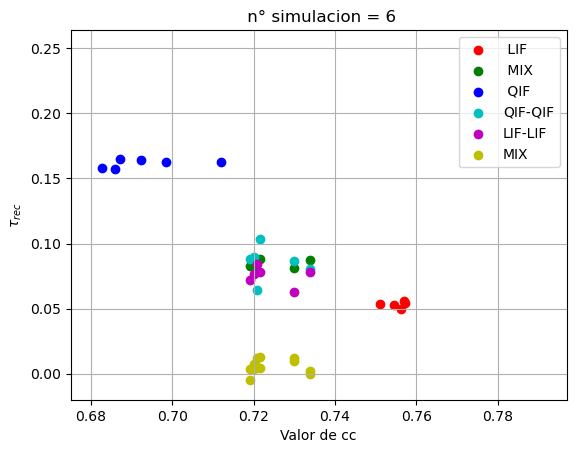

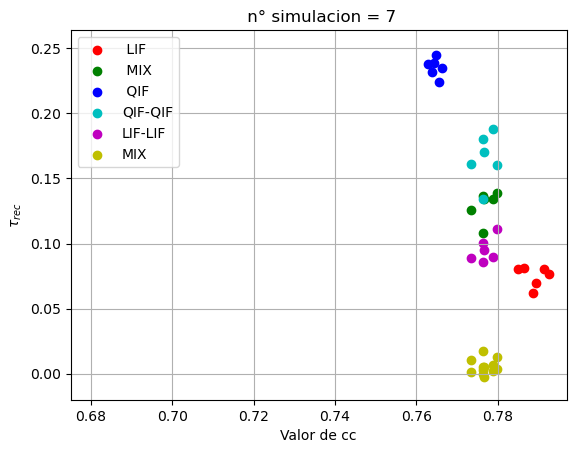

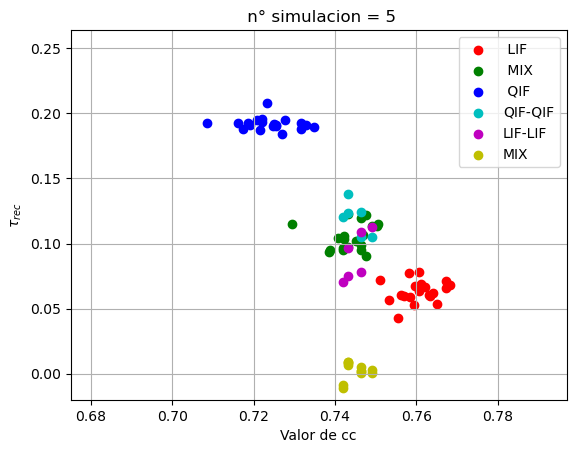

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Obtener los colores para cada valor único de 'pqif'
colores = ['r', 'g', 'b']


# Inicializa las variables y estructuras de datos necesarias
simulations = [6, 7, 5]
# Inicializar listas para almacenar los valores de tau_rec para cada cuadrante y simulación

# Bucle sobre las simulaciones
for num_sim in simulations:

    nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Filtrar los datos para nloop = 9
    data_nloop_11 = data[data['nloop'] == 10]

    # Obtener los valores únicos de 'pqif' para esta simulación
    pqif_values = data_nloop_11['pqif'].unique()

    # Iterar sobre cada valor único de 'pqif'
    for i, pqif_value in enumerate(pqif_values):
        # Filtrar los datos para este valor de 'pqif'
        data_pqif = data_nloop_11[data_nloop_11['pqif'] == pqif_value]

        # Obtener los valores de tau_rec y cc para este valor de 'pqif'
        tau_rec_values = data_pqif['tau_rec']
        cc_values = data_pqif['cc']

        if pqif_value == 0:
            label = 'LIF'
        elif pqif_value == 0.5:
            label = 'MIX'
        elif pqif_value == 1:
            label = 'QIF'

        # Graficar tau_rec vs cc para este valor de 'pqif'
        plt.scatter(cc_values, tau_rec_values, label=f' {label}', color=colores[i])
        plt.title(f' n° simulacion = {num_sim}')


        plt.xlabel('CC')
        plt.ylabel('Tau_rec')

        # Ajustar el diseño del subplot
        plt.grid(True)


        if i == 2:
            plt.legend()
    plt.xlim(0.675, 0.797)
    plt.ylim(-0.02, 0.264)
    


    pqif = 0.5
    tau_rec_cuadrante1 = []
    tau_rec_cuadrante2 = []
    tau_rec_cuadrante3 = []
    tau_rec_cuadrante4 = []
    
    cant_seed = 6
    cc_values = []

    # Bucle sobre las semillas
    for k in range(cant_seed):
        # Simular y calcular tau_rec para cada cuadrante
        matrix = csv_to_matrix(f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
        rows, cols = matrix.shape
        mid_row, mid_col = rows // 2, cols // 2
        cuadrante1 = matrix[:mid_row, :mid_col]
        cuadrante2 = matrix[:mid_row, mid_col:]
        cuadrante3 = matrix[mid_row:, :mid_col]
        cuadrante4 = matrix[mid_row:, mid_col:]
        
        _, tau_rec1, _, _, _ = motifs(cuadrante1, N/2)
        _, tau_rec2, _, _, _ = motifs(cuadrante2, N/2)
        _, tau_rec3, _, _, _ = motifs(cuadrante3, N/2)
        _, tau_rec4, _, _, _ = motifs(cuadrante4, N/2)
        
        # Guardar los valores de tau_rec y cc para cada cuadrante
        tau_rec_cuadrante1.append(tau_rec1)
        tau_rec_cuadrante2.append(tau_rec2)
        tau_rec_cuadrante3.append(tau_rec3)
        tau_rec_cuadrante4.append(tau_rec4)

        # Obtener los valores de cc para esta semilla desde el archivo de resultados
        nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
        data = pd.read_csv(nombre_archivo)
        data_select = data[(data['pqif'] == 0.5) & (data['nloop'] == 10) & (data['seed'] == k)]
        cc_values.append(data_select['cc'].values[0])

    # Convertir las listas a arrays de numpy para facilitar el manejo de los datos
    tau_rec_cuadrante1 = np.array(tau_rec_cuadrante1)
    tau_rec_cuadrante2 = np.array(tau_rec_cuadrante2)
    tau_rec_cuadrante3 = np.array(tau_rec_cuadrante3)
    tau_rec_cuadrante4 = np.array(tau_rec_cuadrante4)
    cc_values = np.array(cc_values)

    # Graficar tau_rec para todos los cuadrantes en función de cc
    plt.scatter(cc_values, tau_rec_cuadrante1, color='c', label='QIF-QIF')
    plt.scatter(cc_values, tau_rec_cuadrante4, color='m', label='LIF-LIF')
    plt.scatter(cc_values, tau_rec_cuadrante2, color='y', label='MIX')
    plt.scatter(cc_values, tau_rec_cuadrante3, color='y')
    plt.title(f' n° simulacion = {num_sim}')

    plt.xlim(0.675, 0.797)
    # Etiquetas y leyenda
    plt.xlabel('Valor de cc')
    plt.ylabel(r'$\tau_{rec}$')
    plt.legend()
    plt.grid(True)
    plt.ylim(-0.02, 0.264)
    plt.show()

Analizemos los pesos en los distintos casos

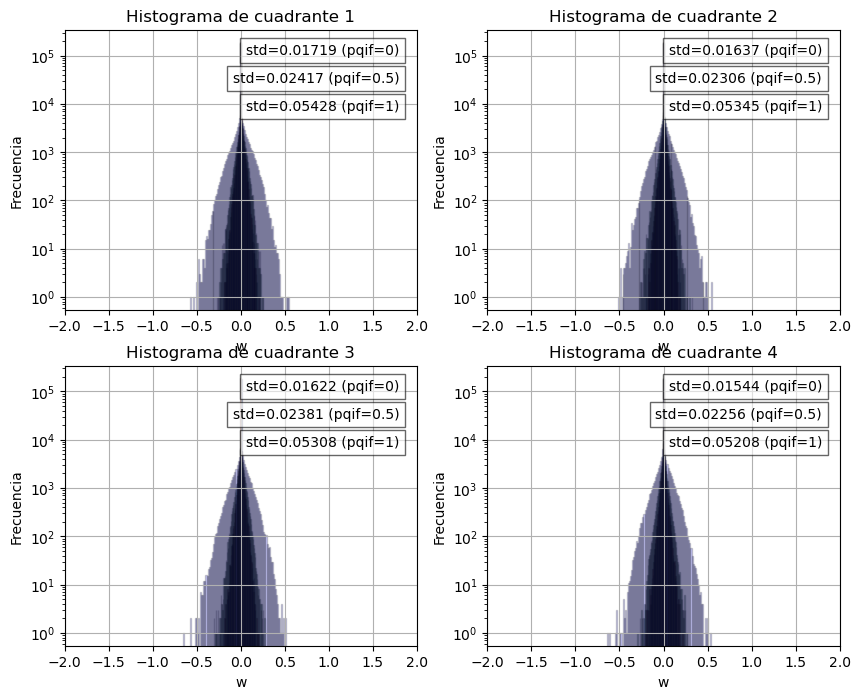

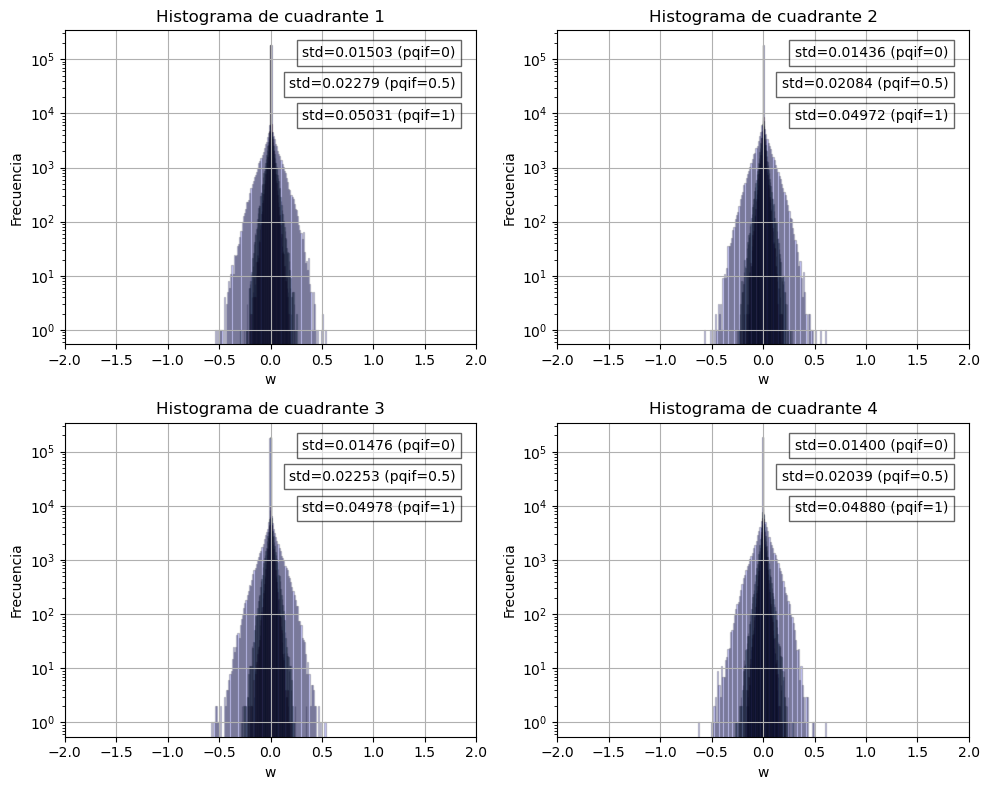

In [82]:
import numpy as np
import matplotlib.pyplot as plt

cant_seed_ = 5
cuadrante1, cuadrante2, cuadrante3, cuadrante4 = np.zeros(cant_seed_-1, dtype=object), np.zeros(cant_seed_-1, dtype=object), np.zeros(cant_seed_-1, dtype=object), np.zeros(cant_seed_-1, dtype=object)



# Colores para cada pqif
colors = {0: 'red', 0.5: 'green', 1: 'blue'}

for num_sim in [6,7]:
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    for pqif in [0, 0.5, 1]:
        for k in range(cant_seed_-1):
            matrix = csv_to_matrix(f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k+1}')
            rows, cols = matrix.shape
            mid_row, mid_col = rows // 2, cols // 2
            cuadrante1[k] = matrix[:mid_row, :mid_col]
            cuadrante2[k] = matrix[:mid_row, mid_col:]
            cuadrante3[k] = matrix[mid_row:, :mid_col]
            cuadrante4[k] = matrix[mid_row:, mid_col:]

        cuadrantes = [cuadrante1, cuadrante2, cuadrante3, cuadrante4]

        for m, ax in enumerate(axes.flatten()):
            # Concatenar todas las matrices del cuadrante en una sola matriz
            cuadrante_combined = np.concatenate([mat.flatten() for mat in cuadrantes[m]])
            
            # Construir el histograma en el subplot correspondiente
            counts, bins = np.histogram(cuadrante_combined, bins=100)
            std = np.std(cuadrante_combined)
            text_x = 0.95
            text_y = 0.95 - 0.1 * list(colors.keys()).index(pqif)  # Adjust y position to avoid overlap
            
            # Graficar el histograma con color específico
            ax.hist(bins[:-1], bins, weights=counts, color=colors[pqif], edgecolor='black', alpha=0.2, label=f'pqif={pqif}')
            ax.text(text_x, text_y, f"std={std:.5f} (pqif={pqif})", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.6))

            ax.set_title(f'Histograma de cuadrante {m+1}')
            ax.set_xlabel('w')
            ax.set_ylabel('Frecuencia')
            ax.set_yscale("log")
            ax.set_xlim(-2, 2)
            ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Dividir la matriz en cuatro cuadrantes
cant_seed_ = 60
cuadrante1, cuadrante2, cuadrante3, cuadrante4 = np.zeros(cant_seed_, dtype=object), np.zeros(cant_seed_, dtype=object), np.zeros(cant_seed_, dtype=object), np.zeros(cant_seed_, dtype=object)

for j in range(2):
    matrices = matrices_prepost[j]

    for k in range(cant_seed_):
        matrix_ = matrices[k]

        matrix = np.zeros((N,N))
        indice = 

        for i in range(500):
            for j in range(500):
                matrix[i,j] = matrix_[indice[i], indice[j]]


        rows, cols = matrix.shape
        mid_row, mid_col = rows // 2, cols // 2

        cuadrante1[k] = matrix[:mid_row, :mid_col] # Cuadrante superior izquierdo
        cuadrante2[k] = matrix[:mid_row, mid_col:]   # Cuadrante superior derecho
        cuadrante3[k] = matrix[mid_row:, :mid_col]   # Cuadrante inferior izquierdo
        cuadrante4[k] = matrix[mid_row:, mid_col:]    # Cuadrante inferior derecho
        

    cuadrantes = [cuadrante1, cuadrante2, cuadrante3, cuadrante4]
    cuadrante_combined = np.zeros(4, dtype = object)


    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    for m, ax in enumerate(axes.flatten()):
        # Concatenar todas las matrices del cuadrante en una sola matriz
        cuadrante_combined = np.concatenate(cuadrantes[m])
        

        # Construir el histograma en el subplot correspondiente
        counts, bins = np.histogram(cuadrante_combined.flatten(), bins=100)
        std = np.std(cuadrante_combined.flatten())
        text_x = 0.95
        text_y = 0.95
        ax.text(text_x, text_y, f"std={std:.5f}", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=1))

        ax.hist(bins[:-1], bins, weights=counts, color='skyblue', edgecolor='black')
        ax.set_title(f'Histograma de cuadrante {m+1}')
        ax.set_xlabel('w')
        ax.set_ylabel('Frecuencia')
        ax.set_yscale("log")
        ax.set_xlim(-2,2)
        ax.grid(True)

    plt.tight_layout()
    plt.show()

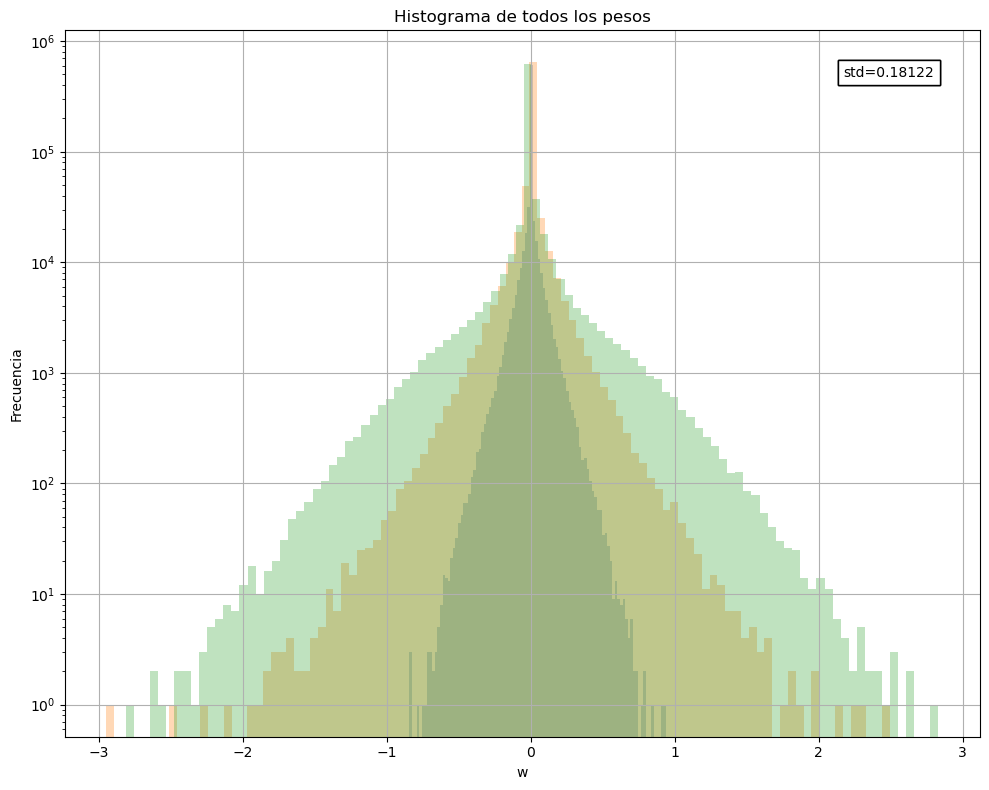

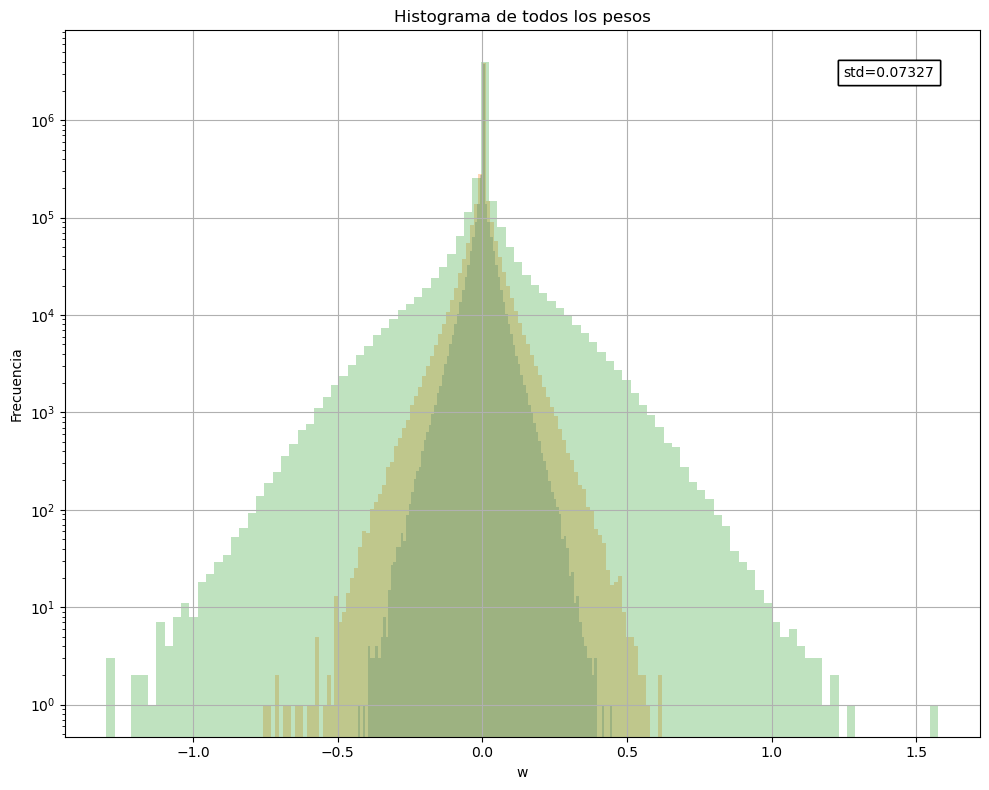

In [33]:
import numpy as np
import matplotlib.pyplot as plt

cant_seed_ = 20
num_sim = 5

for num_sim in [0, 5]:
        # Construir el histograma
    fig, ax = plt.subplots(figsize=(10, 8))
    for pqif in [0, 0.5, 1]:
        # Inicializar una lista para almacenar todos los pesos.
        todos_los_pesos = []

        for k in range(cant_seed_):
            # Leer la matriz desde el archivo CSV
            filename = f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}'
            matrix = csv_to_matrix(filename)

            # Añadir todos los pesos de la matriz a la lista
            todos_los_pesos.extend(matrix.flatten())

        # Convertir la lista de pesos en un array de NumPy
        todos_los_pesos = np.array(todos_los_pesos)



        # Calcular el histograma
        counts, bins = np.histogram(todos_los_pesos, bins=100)

        # Calcular la desviación estándar
        std = np.std(todos_los_pesos)
        text_x = 0.95
        text_y = 0.95
        ax.text(text_x, text_y, f"std={std:.5f}", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=1))

        # Graficar el histograma
        ax.hist(bins[:-1], bins, weights=counts, alpha = 0.3)
        ax.set_title('Histograma de todos los pesos')
        ax.set_xlabel('w')
        ax.set_ylabel('Frecuencia')
        ax.set_yscale("log")

        ax.grid(True)

    plt.tight_layout()
    plt.show()


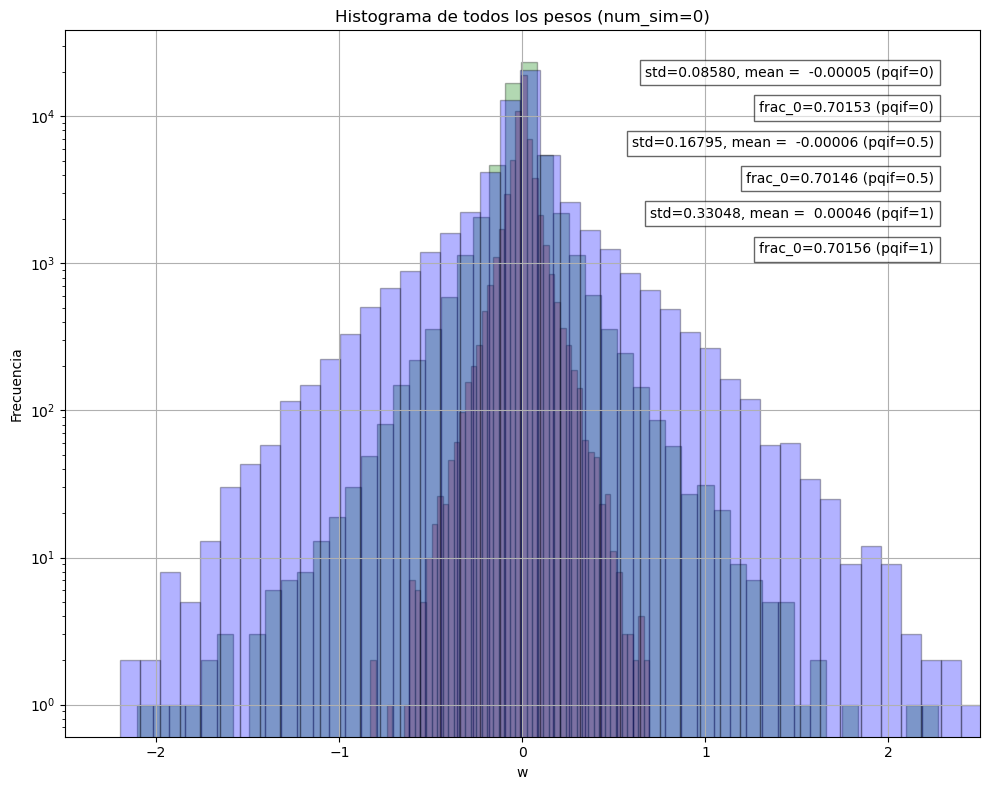

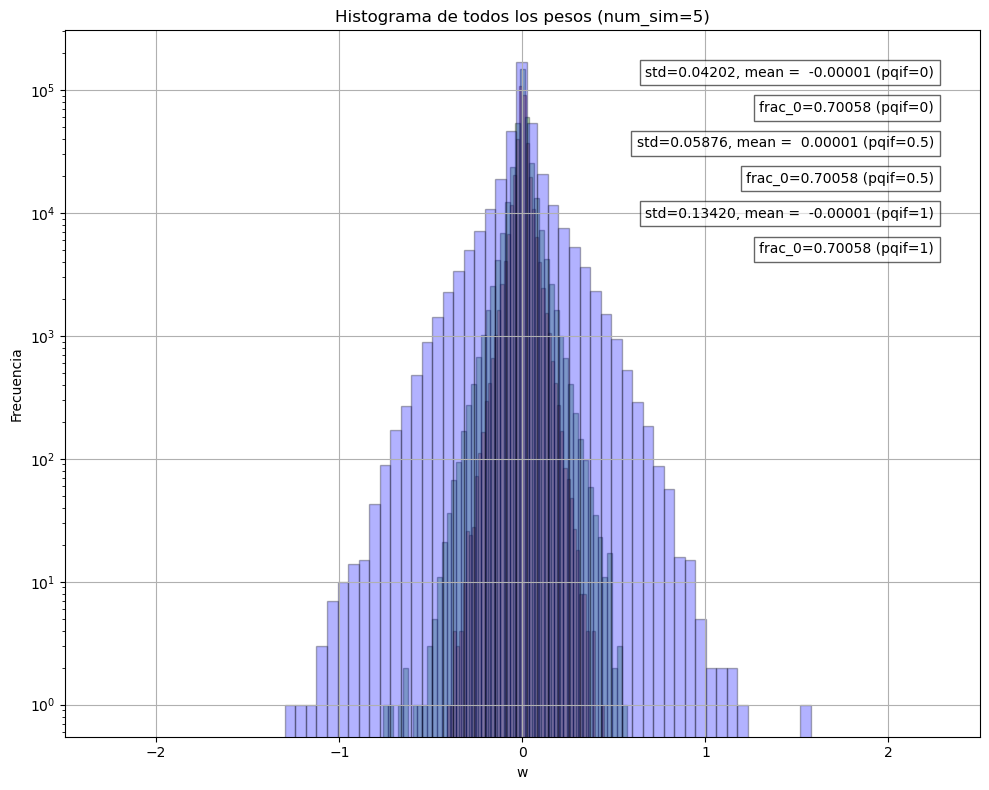

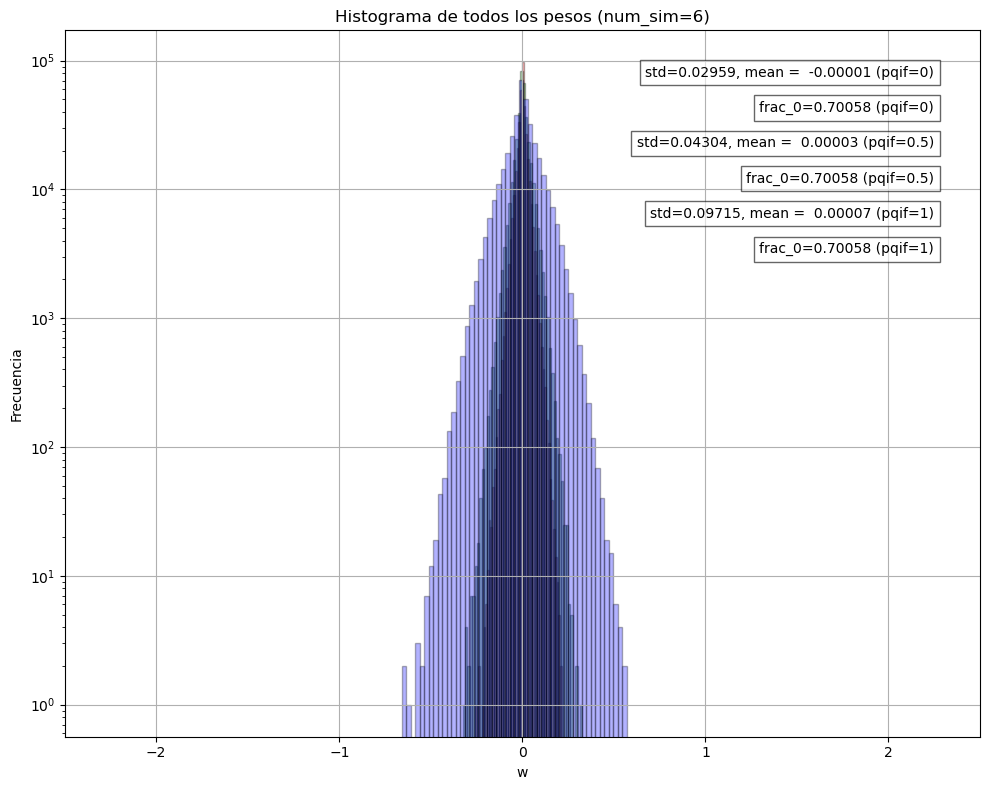

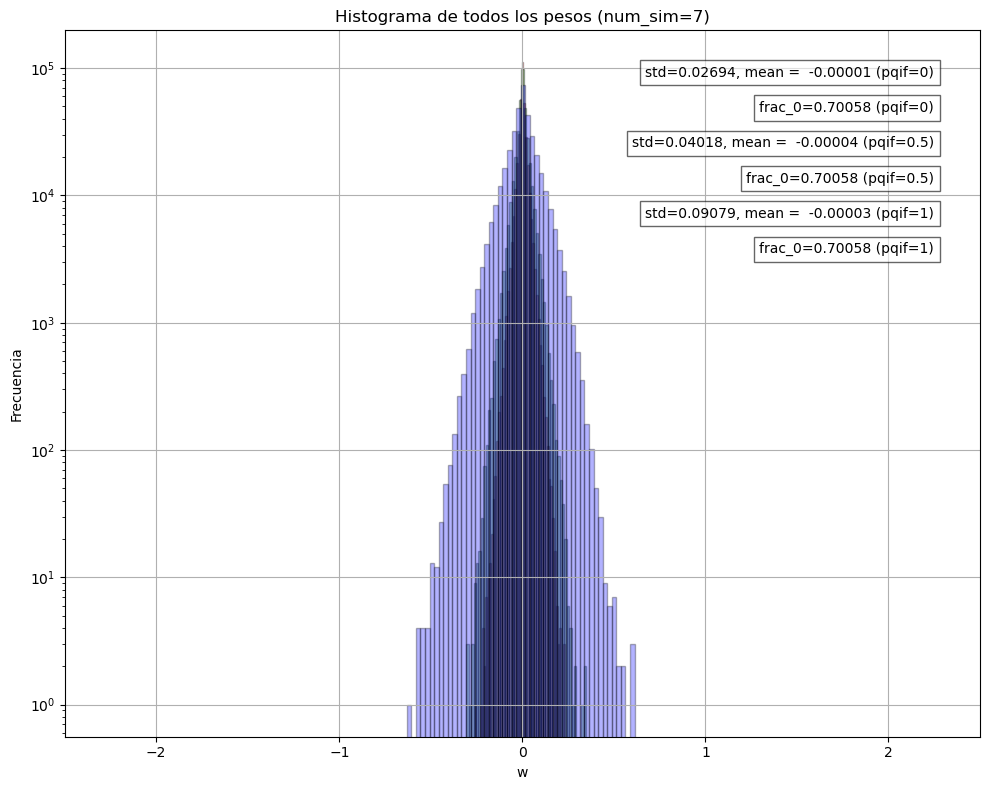

In [84]:
import numpy as np
import matplotlib.pyplot as plt

cant_seed_ = 6
num_sim = 5

# Colores para cada pqif
colors = {0: 'red', 0.5: 'green', 1: 'blue'}

for num_sim in [0, 5, 6, 7]:
    # Construir el histograma
    fig, ax = plt.subplots(figsize=(10, 8))
    
    for pqif in [0, 0.5, 1]:
        # Inicializar una lista para almacenar todos los pesos.
        todos_los_pesos = []

        for k in range(1, cant_seed_):
            # Leer la matriz desde el archivo CSV
            filename = f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}'
            matrix = csv_to_matrix(filename)  # Aquí usas tu función definida en otra celda del notebook

            # Añadir todos los pesos de la matriz a la lista
            todos_los_pesos.extend(matrix.flatten())

        # Convertir la lista de pesos en un array de NumPy
        todos_los_pesos = np.array(todos_los_pesos)

        # Calcular la fracción de elementos que son 0
        total_elements = len(todos_los_pesos)
        zero_elements = np.sum(todos_los_pesos == 0)
        zero_fraction = zero_elements / total_elements

        # Excluir todos los elementos que son iguales a 0
        todos_los_pesos = todos_los_pesos[todos_los_pesos != 0]

        # Calcular la mediana
        mediana = np.median(todos_los_pesos)

        # Calcular el histograma
        counts, bins = np.histogram(todos_los_pesos, bins=50)

        # Calcular la desviación estándar
        std = np.std(todos_los_pesos)
        text_x = 0.95
        text_y = 0.95 - 0.1 * list(colors.keys()).index(pqif)  # Ajustar la posición y para evitar superposiciones
        ax.text(text_x, text_y, f"std={std:.5f}, mean =  {mediana:.5f} (pqif={pqif})", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.6))
        ax.text(text_x, text_y - 0.05, f"frac_0={zero_fraction:.5f} (pqif={pqif})", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.6))
      

        # Graficar el histograma con color específico
        ax.hist(bins[:-1], bins, weights=counts, color=colors[pqif], edgecolor='black', alpha=0.3, label=f'pqif={pqif}')

    ax.set_title(f'Histograma de todos los pesos (num_sim={num_sim})')
    ax.set_xlabel('w')
    ax.set_ylabel('Frecuencia')
    ax.set_yscale("log")
    ax.set_xlim(-2.5, 2.5)
    ax.grid(True)

    plt.tight_layout()
    plt.show()


In [99]:
plt.show()

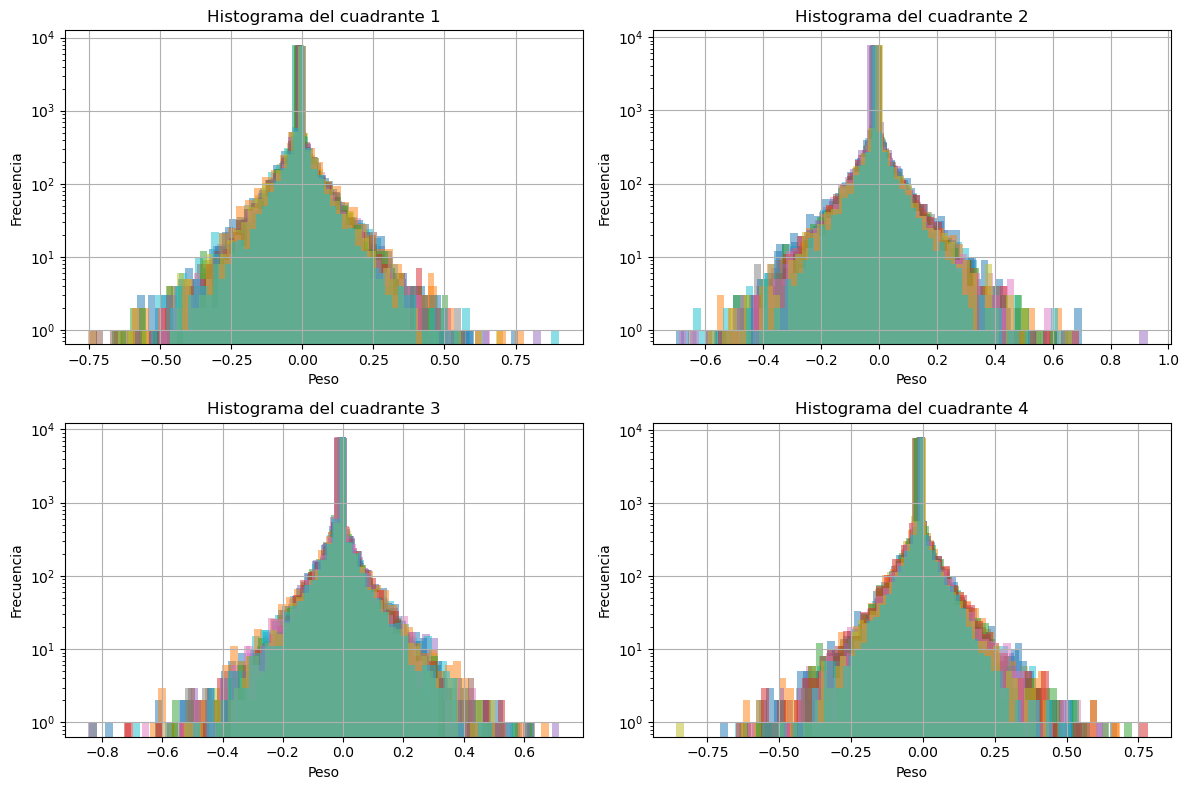

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las variables necesarias
cant_seed = 20
num_sims = [0]
pqif_vector = [0]
colores = ['red', 'blue']
N = 200

for num_sim in num_sims:
    # Leer el archivo que contiene las frecuencias de los targets de cada neurona
    nombre_archivo_frecuencias = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_targets.csv"
    frecuencias_data = pd.read_csv(nombre_archivo_frecuencias)

    # Extraer los valores únicos de frecuencia y ordenarlos
    valores_frecuencia = frecuencias_data['romega'].unique()
    valores_frecuencia = sorted(valores_frecuencia)

    # Crear un diccionario para almacenar las neuronas asociadas a cada frecuencia
    neuronas_por_frecuencia = {frecuencia: frecuencias_data[frecuencias_data['romega'] == frecuencia]['Neurona'].tolist() for frecuencia in valores_frecuencia}

    # Concatenar los vectores de índices de las neuronas para ambas frecuencias
    indices_frecuencia_1 = neuronas_por_frecuencia[valores_frecuencia[0]]
    indices_frecuencia_2 = neuronas_por_frecuencia[valores_frecuencia[1]]
    indices_concatenados = indices_frecuencia_1 + indices_frecuencia_2
 

    # Inicializar un diccionario para almacenar los histogramas de pesos para cada frecuencia
    histogramas_por_frecuencia = {frecuencia: [] for frecuencia in valores_frecuencia}

    # Bucle sobre los valores de pqif
    for pqif, color in zip(pqif_vector, colores):
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
        # Bucle sobre las semillas
        for k in range(cant_seed):
            # Leer la matriz de pesos
            matrix_ = csv_to_matrix(f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
            matrix = np.zeros((N, N))
            for i in range(N):
                for j in range(N):
                    matrix[i, j] = matrix_[indices_concatenados[i], indices_concatenados[j]]
            
            # Dividir la matriz en cuatro cuadrantes
            mid_row, mid_col = N // 2, N // 2
            cuadrante1 = matrix[:mid_row, :mid_col]
            cuadrante2 = matrix[:mid_row, mid_col:]
            cuadrante3 = matrix[mid_row:, :mid_col]
            cuadrante4 = matrix[mid_row:, mid_col:]
                        
            for i, cuadrante in enumerate([cuadrante1, cuadrante2, cuadrante3, cuadrante4]):
                ax = axes[i // 2, i % 2]
                counts, bins = np.histogram(cuadrante.flatten(), bins=50)
                ax.bar(bins[:-1], counts, width=np.diff(bins), alpha=0.5)
                ax.set_title(f'Histograma del cuadrante {i+1}')
                ax.set_xlabel('Peso')
                ax.set_ylabel('Frecuencia')
                ax.set_yscale('log')  # Establecer escala logarítmica en el eje y
                ax.grid(True)
        plt.tight_layout()
        plt.show()




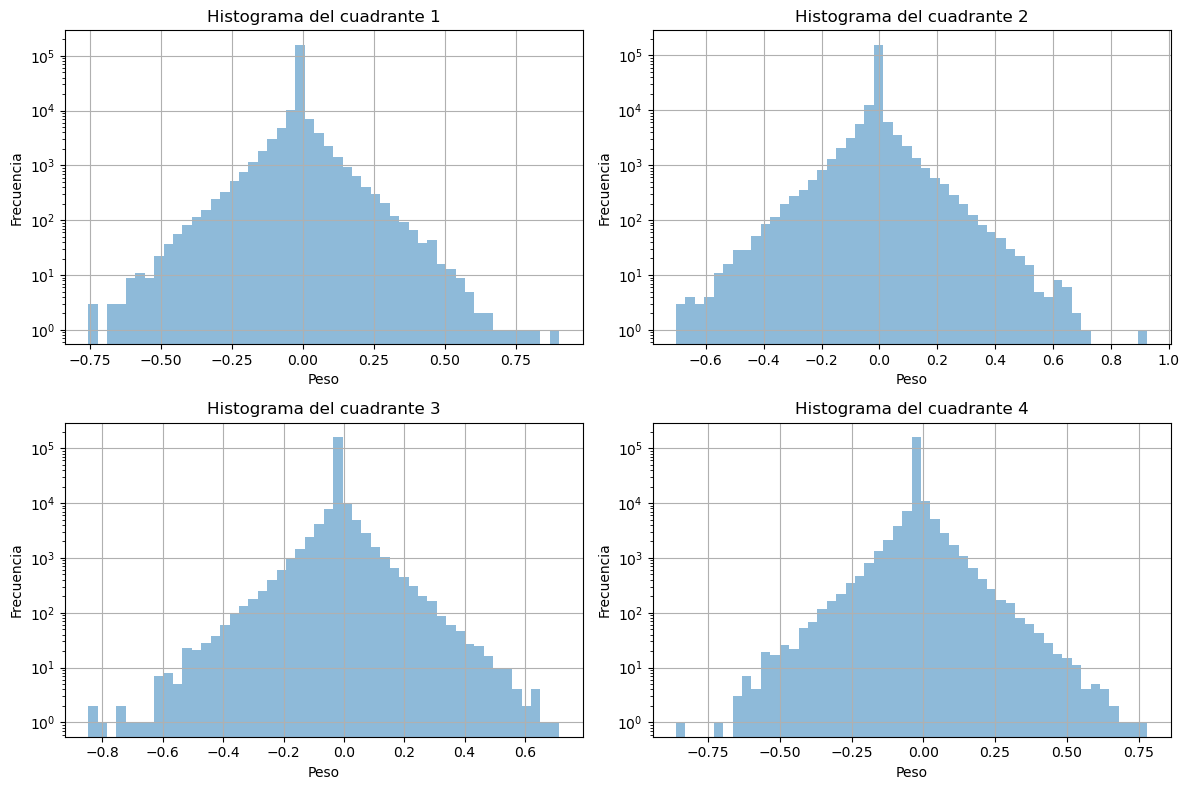

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las variables necesarias
cant_seed = 20
num_sims = [0]
pqif_vector = [0]
colores = ['red', 'blue']
N = 200

for num_sim in num_sims:
    # Inicializar matrices para almacenar todos los datos de todas las semillas
    all_matrices = np.zeros((cant_seed * len(pqif_vector), N, N))

    # Leer el archivo que contiene las frecuencias de los targets de cada neurona
    nombre_archivo_frecuencias = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_targets.csv"
    frecuencias_data = pd.read_csv(nombre_archivo_frecuencias)

    # Extraer los valores únicos de frecuencia y ordenarlos
    valores_frecuencia = frecuencias_data['romega'].unique()
    valores_frecuencia = sorted(valores_frecuencia)

    # Crear un diccionario para almacenar las neuronas asociadas a cada frecuencia
    neuronas_por_frecuencia = {frecuencia: frecuencias_data[frecuencias_data['romega'] == frecuencia]['Neurona'].tolist() for frecuencia in valores_frecuencia}

    # Concatenar los vectores de índices de las neuronas para ambas frecuencias
    indices_frecuencia_1 = neuronas_por_frecuencia[valores_frecuencia[0]]
    indices_frecuencia_2 = neuronas_por_frecuencia[valores_frecuencia[1]]
    indices_concatenados = indices_frecuencia_1 + indices_frecuencia_2

    # Inicializar un índice para llenar la matriz de datos
    data_index = 0

    # Bucle sobre los valores de pqif
    for pqif, color in zip(pqif_vector, colores):
        # Bucle sobre las semillas
        for k in range(cant_seed):
            # Leer la matriz de pesos
            matrix_ = csv_to_matrix(f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
            matrix = np.zeros((N, N))
            for i in range(N):
                for j in range(N):
                    matrix[i, j] = matrix_[indices_concatenados[i], indices_concatenados[j]]
            
            # Almacenar la matriz en el arreglo de matrices
            all_matrices[data_index] = matrix

            # Incrementar el índice de datos
            data_index += 1

    # Dividir la matriz combinada en cuatro cuadrantes
    mid_row, mid_col = N // 2, N // 2
    cuadrante1 = all_matrices[:, :mid_row, :mid_col]
    cuadrante2 = all_matrices[:, :mid_row, mid_col:]
    cuadrante3 = all_matrices[:, mid_row:, :mid_col]
    cuadrante4 = all_matrices[:, mid_row:, mid_col:]

    # Crear subplots para los histogramas de los cuatro cuadrantes
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    for i, cuadrante in enumerate([cuadrante1, cuadrante2, cuadrante3, cuadrante4]):
        ax = axes[i // 2, i % 2]
        # Combinar todos los datos de todas las semillas para este cuadrante
        all_data = cuadrante.flatten()
        counts, bins = np.histogram(all_data, bins=50)
        ax.bar(bins[:-1], counts, width=np.diff(bins), alpha=0.5)
        ax.set_title(f'Histograma del cuadrante {i+1}')
        ax.set_xlabel('Peso')
        ax.set_ylabel('Frecuencia')
        ax.set_yscale('log')  # Establecer escala logarítmica en el eje y
        ax.grid(True)

    plt.tight_layout()
    plt.show()


[0, 3, 4, 9, 11, 14, 15, 19, 24, 27, 28, 31, 32, 34, 36, 38, 39, 40, 41, 43, 46, 49, 50, 52, 54, 56, 57, 59, 60, 62, 68, 70, 73, 75, 78, 81, 82, 83, 84, 85, 90, 92, 94, 100, 104, 105, 108, 109, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 130, 131, 133, 134, 137, 138, 140, 142, 144, 145, 150, 152, 154, 160, 163, 164, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 181, 184, 185, 186, 187, 189, 190, 192, 193, 196, 197, 198, 200, 201, 202, 205, 210, 211, 216, 218, 221, 224, 225, 233, 234, 235, 241, 242, 245, 246, 249, 250, 252, 254, 255, 257, 258, 259, 260, 265, 266, 273, 275, 277, 280, 281, 284, 286, 287, 290, 292, 294, 296, 297, 300, 302, 303, 304, 305, 306, 307, 309, 310, 312, 313, 316, 317, 319, 323, 326, 332, 333, 334, 336, 337, 339, 341, 347, 350, 352, 353, 354, 355, 356, 357, 361, 362, 365, 366, 367, 368, 372, 373, 375, 377, 381, 382, 384, 385, 388, 389, 391, 392, 393, 395, 398, 399, 401, 402, 403, 404, 405, 408, 409, 412, 414, 416, 417, 4

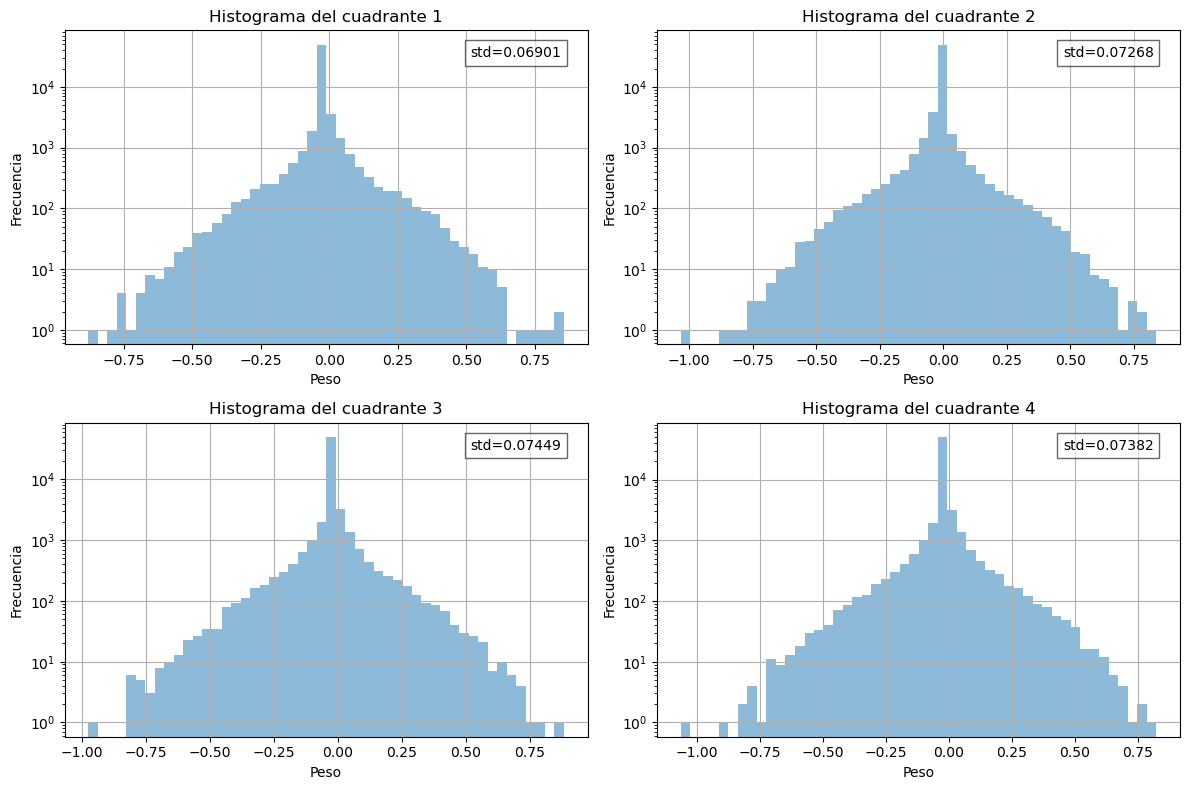

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las variables necesarias
cant_seed = 1
num_sims = [5]
pqif_vector = [1]
colores = ['red', 'blue']
N = 500

for num_sim in num_sims:
    # Inicializar matrices para almacenar todos los datos de todas las semillas
    all_matrices = np.zeros((cant_seed * len(pqif_vector), N, N))

    # Leer el archivo que contiene las frecuencias de los targets de cada neurona
    nombre_archivo_frecuencias = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_targets.csv"
    frecuencias_data = pd.read_csv(nombre_archivo_frecuencias)

    # Extraer los valores únicos de frecuencia y ordenarlos
    valores_frecuencia = frecuencias_data['romega'].unique()
    valores_frecuencia = sorted(valores_frecuencia)

    # Crear un diccionario para almacenar las neuronas asociadas a cada frecuencia
    neuronas_por_frecuencia = {frecuencia: frecuencias_data[frecuencias_data['romega'] == frecuencia]['Neurona'].tolist() for frecuencia in valores_frecuencia}

    # Concatenar los vectores de índices de las neuronas para ambas frecuencias
    indices_frecuencia_1 = neuronas_por_frecuencia[valores_frecuencia[0]]
    indices_frecuencia_2 = neuronas_por_frecuencia[valores_frecuencia[1]]
    indices_concatenados = indices_frecuencia_1 + indices_frecuencia_2
    print(indices_concatenados)

    # Inicializar un índice para llenar la matriz de datos
    data_index = 0

    # Bucle sobre los valores de pqif
    for pqif, color in zip(pqif_vector, colores):
        # Bucle sobre las semillas
        for k in range(cant_seed):
            # Leer la matriz de pesos
            matrix_ = csv_to_matrix(f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
            matrix = np.zeros((N, N))
            for i in range(N):
                for j in range(N):
                    matrix[i, j] = matrix_[indices_concatenados[i], indices_concatenados[j]]
            
            # Almacenar la matriz en el arreglo de matrices
            all_matrices[data_index] = matrix

            # Incrementar el índice de datos
            data_index += 1

    # Dividir la matriz combinada en cuatro cuadrantes
    mid_row, mid_col = N // 2, N // 2
    cuadrante1 = all_matrices[:, :mid_row, :mid_col]
    cuadrante2 = all_matrices[:, :mid_row, mid_col:]
    cuadrante3 = all_matrices[:, mid_row:, :mid_col]
    cuadrante4 = all_matrices[:, mid_row:, mid_col:]

    # Crear subplots para los histogramas de los cuatro cuadrantes
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    for i, cuadrante in enumerate([cuadrante1, cuadrante2, cuadrante3, cuadrante4]):
        ax = axes[i // 2, i % 2]
        # Combinar todos los datos de todas las semillas para este cuadrante
        all_data = cuadrante.flatten()
        counts, bins = np.histogram(all_data, bins=50)
        ax.bar(bins[:-1], counts, width=np.diff(bins), alpha=0.5)
        ax.set_title(f'Histograma del cuadrante {i+1}')
        ax.set_xlabel('Peso')
        ax.set_ylabel('Frecuencia')
        ax.set_yscale('log')  # Establecer escala logarítmica en el eje y
        ax.grid(True)

        # Calcular la desviación estándar
        std = np.std(all_data)
        text_x = 0.95
        text_y = 0.95
        ax.text(text_x, text_y, f"std={std:.5f}", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.6))

    plt.tight_layout()
    plt.show()


[0, 1, 2, 5, 8, 9, 10, 12, 17, 18, 20, 23, 24, 25, 27, 28, 32, 33, 34, 35, 37, 39, 43, 44, 45, 46, 48, 54, 57, 58, 59, 60, 61, 62, 63, 64, 65, 69, 71, 73, 75, 80, 81, 82, 87, 88, 89, 90, 92, 94, 95, 96, 97, 99, 100, 103, 105, 106, 116, 117, 118, 119, 121, 123, 125, 128, 130, 132, 136, 138, 141, 142, 146, 147, 148, 150, 151, 156, 158, 159, 161, 164, 165, 166, 167, 168, 170, 171, 177, 178, 181, 185, 187, 188, 189, 191, 192, 194, 197, 199, 3, 4, 6, 7, 11, 13, 14, 15, 16, 19, 21, 22, 26, 29, 30, 31, 36, 38, 40, 41, 42, 47, 49, 50, 51, 52, 53, 55, 56, 66, 67, 68, 70, 72, 74, 76, 77, 78, 79, 83, 84, 85, 86, 91, 93, 98, 101, 102, 104, 107, 108, 109, 110, 111, 112, 113, 114, 115, 120, 122, 124, 126, 127, 129, 131, 133, 134, 135, 137, 139, 140, 143, 144, 145, 149, 152, 153, 154, 155, 157, 160, 162, 163, 169, 172, 173, 174, 175, 176, 179, 180, 182, 183, 184, 186, 190, 193, 195, 196, 198]


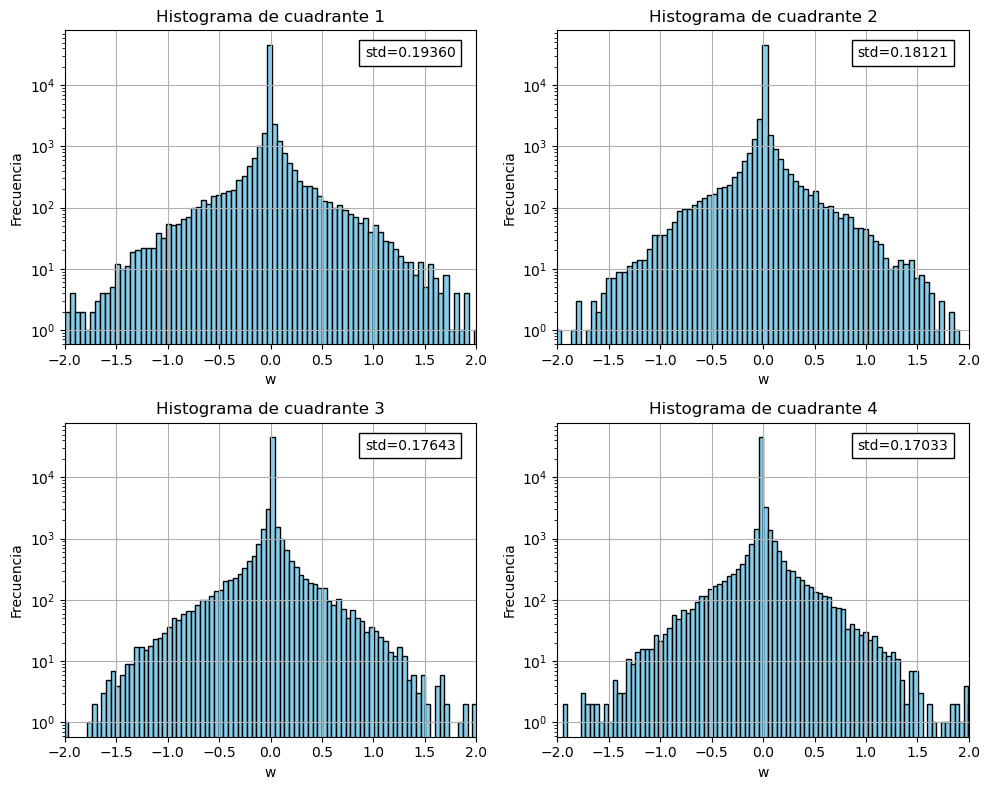

In [130]:

cuadrante1, cuadrante2, cuadrante3, cuadrante4 = np.zeros(cant_seed_, dtype=object), np.zeros(cant_seed_, dtype=object), np.zeros(cant_seed_, dtype=object), np.zeros(cant_seed_, dtype=object)

import numpy as np
import matplotlib.pyplot as plt

# Definir las variables necesarias
cant_seed = 1
num_sims = [0]
pqif_vector = [1]
colores = ['red', 'blue']
N = 200

for num_sim in num_sims:
    # Inicializar matrices para almacenar todos los datos de todas las semillas
    all_matrices = np.zeros((cant_seed * len(pqif_vector), N, N))

    # Leer el archivo que contiene las frecuencias de los targets de cada neurona
    nombre_archivo_frecuencias = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_targets.csv"
    frecuencias_data = pd.read_csv(nombre_archivo_frecuencias)

    # Extraer los valores únicos de frecuencia y ordenarlos
    valores_frecuencia = frecuencias_data['romega'].unique()
    valores_frecuencia = sorted(valores_frecuencia)

    # Crear un diccionario para almacenar las neuronas asociadas a cada frecuencia
    neuronas_por_frecuencia = {frecuencia: frecuencias_data[frecuencias_data['romega'] == frecuencia]['Neurona'].tolist() for frecuencia in valores_frecuencia}

    # Concatenar los vectores de índices de las neuronas para ambas frecuencias
    indices_frecuencia_1 = neuronas_por_frecuencia[valores_frecuencia[0]]
    indices_frecuencia_2 = neuronas_por_frecuencia[valores_frecuencia[1]]
    indices_concatenados = indices_frecuencia_1 + indices_frecuencia_2
    print(indices_concatenados)


    for k in range(cant_seed_):
        matrix_ = csv_to_matrix(f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')

        matrix = np.zeros((N,N))

        for i in range(200):
            for j in range(200):
                matrix[i,j] = matrix_[indices_concatenados[i], indices_concatenados[j]]


        rows, cols = matrix.shape
        mid_row, mid_col = rows // 2, cols // 2

        cuadrante1[k] = matrix[:mid_row, :mid_col] # Cuadrante superior izquierdo
        cuadrante2[k] = matrix[:mid_row, mid_col:]   # Cuadrante superior derecho
        cuadrante3[k] = matrix[mid_row:, :mid_col]   # Cuadrante inferior izquierdo
        cuadrante4[k] = matrix[mid_row:, mid_col:]    # Cuadrante inferior derecho
        

    cuadrantes = [cuadrante1, cuadrante2, cuadrante3, cuadrante4]
    cuadrante_combined = np.zeros(4, dtype = object)


    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    for m, ax in enumerate(axes.flatten()):
        # Concatenar todas las matrices del cuadrante en una sola matriz
        cuadrante_combined = np.concatenate(cuadrantes[m])
        

        # Construir el histograma en el subplot correspondiente
        counts, bins = np.histogram(cuadrante_combined.flatten(), bins=100)
        std = np.std(cuadrante_combined.flatten())
        text_x = 0.95
        text_y = 0.95
        ax.text(text_x, text_y, f"std={std:.5f}", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=1))

        ax.hist(bins[:-1], bins, weights=counts, color='skyblue', edgecolor='black')
        ax.set_title(f'Histograma de cuadrante {m+1}')
        ax.set_xlabel('w')
        ax.set_ylabel('Frecuencia')
        ax.set_yscale("log")
        ax.set_xlim(-2,2)
        ax.grid(True)

    plt.tight_layout()
    plt.show()

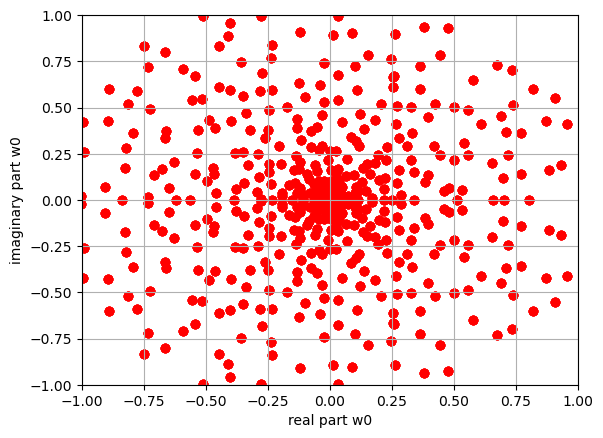

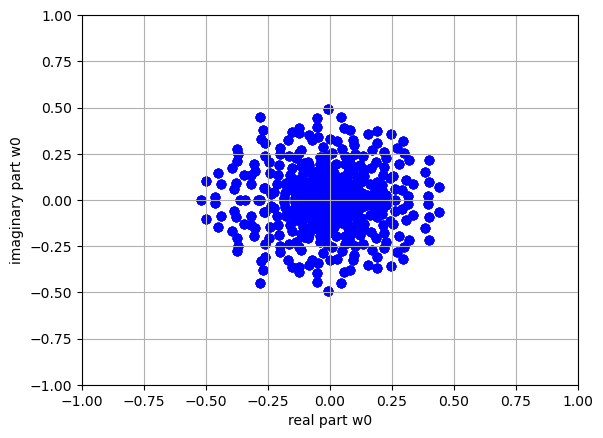

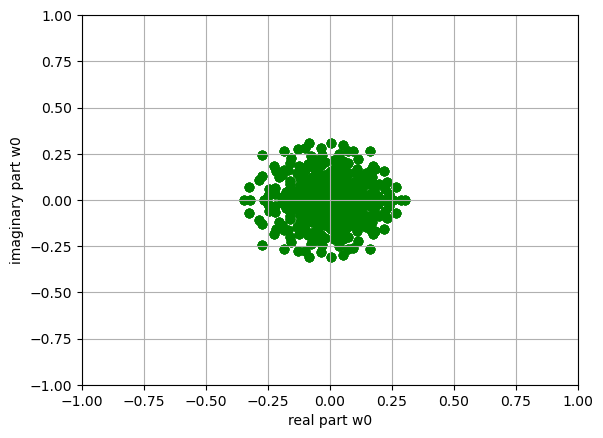

In [140]:
pqif_vector = [1, 0.5, 0]
colores = ['r', 'b', 'g']
num_sim = 7
for k in range(len(pqif_vector)):
    pqif = pqif_vector[k]


    for j in range(1,6):
        filename = f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}'
        matrix = csv_to_matrix(filename)  # Aquí usas tu función definida en otra celda del notebook        
        eigenval,eigenvec=np.linalg.eig(matrix)
        ar=np.real(eigenval)
    
        ai=np.imag(eigenval)
        plt.xlabel('real part w0')
        plt.ylabel('imaginary part w0')
        plt.xlim([-1,1])
        plt.ylim([-1,1])
        plt.scatter(ar,ai, color = colores[k], label = f'pqif = {pqif}', alpha = 1)

    plt.grid()
        
    plt.show()